# Heat Smart Orkney: Demand response (DR) valuation

# Table of Contents  <a class="anchor" id="contents"></a>

* [1. Summary](#summary)
* [2. Introduction](#introduction)
* [3. Technologies and Techniques](#tools)
* [4. Results](#results)
    - How much energy is currently curtailed annually across the Orkney Isles?
* [5. Discussion](#discussion)
    - How much can this be reduced by different levels of DR penetration?
    - How many local households would need to be on our DR scheme in order to supply this level of DR?
* [6. References](#references)
* [7. Appendix](#appendix)

# 1. Summary <a class="anchor" id="summary"></a> 

Orkney has historically been renowned for its wind farm taking advantage of the windy climate in the region. Wind turbine power, however, inherently entails much more uncertainty in the availability of power generation than the conventional power generation like nuclear, thermal and water because of its nature dependent on mother nature wholly. Although Orkney has favorable wind in most of the time in a year, it is still considered uncertain in power generation space because power demand and generation must always match each other at any point in time following the law of conservation of energy with a very narrow absorption capacity in the form of grid frequency variance. One thing we should notice is that uncertainty does not necessarily mean downside alone, it embraces both opportunity and risk. Although renewable energy will bring in the risks to the existing grid control, it has potential opportunity of curtailed power. 

In this study, we have explored whether there is an opportunity to utilise curtailed power of wind turbines which has not been tapped before. Depending on the power demand in the grid, curtailed power can happen anytime, for example, when wind is strong enough but power demand in the grid is very low. In such case, so far, wind turbine has needed to be unloaded to a partial load or shut down while leaving a room to the potential limit of the turbine generator set. In other words, the curtailed power is a hidden opportunity which could not be reaped due to the lack of power demand in the grid at a point in time. 

On the other hand, some sort of energy absorption or storage system is required as additional investments to absorb such curtailed power due to the power demand - generation matching  principle. We included into the study some commercially available device such as home batteries, storage heaters, and electrically heated hot water tanks.

Evaluating the economic feasibility of the curtailed power, we have focused on the following questions as guidelines. 
- How much energy is currently curtailed annually across the Orkney Isles?
- How much can this be reduced by different levels of DR penetration?
- How many local households would need to be on our DR scheme in order to supply this level of DR?

# 2. Introduction <a class="anchor" id="introduction"></a>

# 2.1 Objective
Effective use of curtailed power and find business opportunity, analyzing viability of business proposition to go / no go.

If we can control demand, we may be able to use it to balance the system instead of curtailing
generators. This could provide a number of benefits: 
- it would reduce wastage of renewable energy and thus increase the fraction of energy generated by renewables within the UK;
- it could provide access to cheaper energy for local consumers on Orkney, reducing fuel poverty and linking locals to the benefits of wind turbine development on the isles;
- it would increase the revenue of generators close to the top of the curtailment order and therefore improve the business case for building new (marginal) generators;
- it could help to avoid more costly network capacity upgrades, which would be an alternative solution to the curtailment problem

# 2.2 Hypotheses
1. There is sizable wasted power due to curtailment.
2. There will be physically sufficient room for power storage potential which absorbs redundant power which otherwise curtailed. 
3. Value of such curtailed power is large enough to be shared among households and the company, and additional investment for batteries, storage heaters, hot water storage tanks can be paid back in generally acceptable range of 6 years.
4. Curtailment is affected mainly by wind speed and demand:
    - High wind speed + Low demand results in higher curtailment. For instance, more windy days during autumn and winter, and during nights and midnights. However, not much demand in midnights which could possibly cause higher curtailments in all seasons.
    - Low wind speed + High demand results in lower curtailment. For instance, demands during nights could be higher, but in summer time wind speed is generally lower, which could result in lower curtailments.
6. Due to the geographical location, Orkney never lack of wind and sometimes could be very windy with gusts even in summer. Therefore, we may not be able to see a clear seasonal trend of curtailment.
7. Setpoint could be predicted by wind speed and demand. With constant demand, any changes in wind speed will cause no change in setpoint. On the other hand, with constant wind speed, an increase in demand will results in increase in setpoint and vice versa.

# 2.3 Overview of the approach used in the analysis
We had mainly two parts in the approach, the one is a bit of engineering estimation and exploratory data analysis part and another one is business study part. 
As for the first engineering and EDA part, we proceeded with the following steps. 

### Engineering and EDA part
#### Step 1: Raw data check

We started from simply plotting out all raw data as they are without any cleaning to understand what each variable looks like.
For this check, we chiefly used a scatter plot matrix, time charts and line plots.

- Scatter plot matrix: Power_kw, Setpoint_kW, and Wind_ms to see the operating pattern with those three parameters at a glance
- Time charts: Setpoint_kW, Power_kW, Wind_ms, Demand_mean_kw, N_household to see how it behaves over time and if there are any outliers to be cleaned up.
- Line plots: Average wind velocity vs. hour in a day, Average household power demand vs. hour in a day to see if there is any hourly and seasonal pattern. 

#### Step 2: Potential power estimation and its time series trend

Next, we estimated potential power from rather engineering approach than the regression from the maximum power characteristics of actual generated power(Power_kW) because the actual power in the dataset has both variation and bias, for which variation comes from other unknown factors like ambient temperature and pressure, and bias comes from just one sample out of 500 wind turbines. Therefore, we adopted simple estimation with general industry practice of wind turbine power equation with blade length of 26m, hitting 900kW design limit at 12m/s wind velocity and being placed in the lower variance region of the actual power characteristics(Fig 3.1).
Therefore, potential power is calculated as a single variable function of wind velocity in our study. 
After estimating the potential power, it was plotted in a time chart.

#### Step 3: Curtailed power calculation

Here, we defined curtailed power as:

    Curtailed power(kW) = Potential power(kW) - Setpoint_kw (kW)

Since set point limits the wind turbines to the specified power(kW) whatever they have still room for capacity (potential power in this case), we adopted the power gap between potential power and setpoint for the curtailed power. Another option of curtailed power calculation was the gap between potential power and generated power(Power_kw in the dataset), but an estimation from this formulation could include a lot of transient behaviours of wind turbines where either curtailed could be overestimated or underestimated due to power generation lag time behind the setpoint commanded electronically and instantly from grid control center.
Therefore, we finally concluded to use the above formulation.

In addition, we forced some nuisance operating data to 0 value such as;
- Wind velocity >30m/s: We assumed wind turbine is commanded to stop for its protection.
- Setpoint_kW > Potential power(negative curtailment value): It can be seen where wind < 12m/s and wind turbine runs at partial speed. We interpreted that potential power was set at constant 900kW by default in a day while potential power could be occasionally low at weak wind condition. In such case, negative curtailment occurs in the above formulation.   
- Setpoint_kW = 900: Since there are always minor deviations of actual operating values from a fixed control setting in actual machine operation, we simply forced the curtailed power to 0 when the setpoint is at the maximum 900kW capacity. 

#### Step 4: Conversion (accumulation) of curtailed power(kW) to curtailed energy(kWh)

In this step, we converted from curtailed power to energy. Since the original turbine telemetry dataset is stored as 1-minute interval data, we aggregated each power(kW) of row in the dataset for 60seconds to make it kWh curtailed in every 1 minute. Then the 1-minuted accumulated curtailed can be further aggregated to 1hour, 1month, and 1year for every purpose of visualisations and analysis.

    Curtailed energy(kWh) in a minute = Curtailed power(kW=kJ/sec) x 60sec x 0.278e-3 (=1hr/3600sec) 


After clearing the first part of EDA, we moved on to the second part of business case as below. 
### Business case study part
#### Step 5: Estimate the value of curtailed “energy” in GBP

We converted the curtailed energy obtained in Step4 to GBP using typical electricity price in Scotland. The electricity price is composed of variable and fixed portion each. We assumed that fixed portion doesn't change whatever the curtailment is because 500 wind turbines are already existing, and so variable portion of electricity price is relevant to the curtailed energy.    

#### Step 6: Search relevant data in the market

In order to proceed with business case study, we collected following information for the analysis. 
* Commercially available energy storage devices and their costs (home battery, storage heater, and hot water tank)
* Average household utility consumption (electricity and gas) in Scotland

For the analysis of economic feasibility, we used reference numbers from commercially available devices as an investment cost of the business case. Although there might be other associated costs like system development by Kaluza, administrative overhead, etc., we assumed that the investment in the additional equipment is the main focus.
Average household utility profile in Scotland was referenced to compare that of Orkney to contemplate that how much more energy in Orkney could potentially be electrified from gas. Since total combined energy consumption or energy demand stays more or less the same regardless of its physical form whether it is in heat or electricity, the use of curtailed energy means a shift from gas to electricity unless more overall energy demand emerges in the region such as a lifestyle change to more ample consumption. That is why we estimated gas consumption.    

#### Step 7: Whether the proposed solution is sustainable and economically beneficial to relevant stakeholders

We estimated the profitability of selling additional power to the household which installed the new devices with discounted electricity bill. In our proposal, all additional investment costs are born by Kaluza and households are given discounted electricity bill. This is a similar business model to mobile phone carriers which give mobile phones to users and paid back in monthly fee. We assumed that household would be slow to adopt the expensive equipment unless benefit is immediately visible. So for household, their benefit is cheaper energy bill in total and energy security with storage capability. For Kaluza, additional revenue and profit, and corporate image of ESG is appealing benefit.    

#### Step 8: Future scale up estimation

Since cost benefit can be calculated per unit basis, future scaling up is a matter of "N-household" times. In our estimation, the time scope of the financial estimation is 10 years of an expected equipment life, and the estimated payback period is about 6 years with no discount rate counted. So, the revenue beyond 6 years will become profit as is. If the expansion of the business is rapid, however, we will run out of cash and need continual injection of cash. We estimated a business roadmap considering the timing of additional investment to grow.


# 3. Technologies and techniques <a class="anchor" id="tools"></a>

## 3.1 Assumptions and Conditions:
1. Engineering practice is adopted in the estimation of potential power rather than actual generated, Power_kw.
2. Wind turbine is designed at rated capacity of 900kW at rated wind speed of 12m/s.
3. Curtailed power is effective up to wind 30m/s. 
4. Setpoint is adopted in the estimation of curtailed power rather than actual power generated, Power_kW.
5. Null value is of no use, and to be omitted.
6. 500+ turbines in Orkney, but due to different exact locations the energy generation could vary, either ups or downs. We assumed 500 turbines as the optimal number of turbines in our analysis.
7. Wind velocity pattern and mean energy demand stay the same level as those of data explored. 
8. Electricity price :  Typical Scotland electricity price
9. Utility consumption and cost at household : Typical Scotland statistics data
10. Energy storage device and their cost: from commercially available reference of home battery, storage heater, hot water tank 
11. Storage device life cycle: 10 years
12. Project financial feasibility time scope : 10 years (= storage device life)
13. Expected payback period to go for the project: 6 years 

#### Data cleaning notes
1. Treatment of null value in Power_kw, Setpoint_kw, Wind_ms
    - Setpoint shall never include NA because it comes from a command signal from a grid control system. If it is a measured data from sensors or calculated data from multiple sensor readings combined, null values could be possible for some reason like sensor failure. But since setpoint is a control setting, it can never be null unless control system failure happens. Therefore, any null of Setpoint_kw shall be omitted as abnormal data. 
    - Wind_ms should never include NA because it comes from sensors. NA value happens only when sensor failure or control system failure happens. Therefore, any null value of Wind_ms shall be omitted. 
    - Power_kw also never includes NA because of the same reason as wind, therefore, any null value shall be omitted. 
    - The dataset of 1-minute interval contains overly granular datapoints for economic feasibility study, therefore, removing uncleaned data does not degrade the validity of the overall estimation. 

2. Treatment of 0 Power_kw, Setpoint_kw, Wind_ms
    - Those data is correct reading from actual hardware. Therefore, data with 0 in Power_kw, Setpoint_kw, Wind_ms should be kept in the dataset for simplicity. 
    - For cleaning purpose, Power_kw < 0 if any is better to be forced to 0. Although reverse power could happen in power generation as an abnormal case, but it happens rarely and of no use in business case estimation. Therefore, it should be forced to 0. 
    - Setpoint_kw = 0 shall be kept because it is built into curtailed power, and when it is 0, all potential power becomes curtailed power. 
    - Wind_ms = 0 might be removed because it does not generate any power at 0 speed. But what if it is 0.01m/s? It mathematically generate power, but in reality it is negligible scale. As it is tricky for Wind_ms to be treated properly at around 0, all data except null should be kept.

3. Treatment of missing data in turbine_telemetry.csv
    - 2015 data are not completed, but not faulty. We'll drop 2015 data in plotting some graphs.
    - Some 2017-04 data missing, but it's alright as we have 2016's, we can use 2016-04 data when needed 

4. Treatment of Power_kw above setpoint
    - We omitted data with Power_kw > Setpoint_kw in the analysis. These are special datapoints on the operation envelope which could happen in transient cases. For example, even when the wind turbine was commanded to 0kW setpoint, which is practically a shut-down command from the power grid, the wind turbine cannot stop instantly due to significant inertia of gigantic turbine blades. However, the setpoint signal itself falls down to 0 instantly as it is electronically commanded. Although these datapoints shows normal transient behaviour, they are of no use in curtailed power calculation. Therefore, those are omitted for simplicity and clarity.

## 3.2 Curtailed power (kW) and Curtailed energy (kWh)

## 3.2.1 Choosing blade length for potential power calculation
Potential power (kW) = 0.5 x air density 1.23 x (pi x blade length^2) x (wind speed^3) x Power coefficient 0.4 / 1000 (The Royal Academy of Engineering, n.d.[[10]](#wind-turbine-calculation))

It should be noted that we used power coefficient Cp at constant value of 0.4 in the calculation. As wind turbine blade is generally designed for Cp from 0.35 to 0.45 in the industry practice, we took the average value of the common Cp range. Strictly speaking, Cp takes different values continuously along with wind velocity since Cp is dependent on a design parameter, lamda (= blade tip speed/wind velocity). However, we simply adopted 0.4 for this calculation since blade length and rotational speed was unknown in the given condition for the blade tip speed calculation, and also the impact of this simplification is considered negligibly small.  When an appropriate blade length is selected to match 900kW at rated speed at one end while it gives 0 kW at 0 wind m/s at the other end, wind turbine performance doesn't vary a lot with both the performance ends fixed on its operation envelope. Thus, the concerns on the oversimplification of the model is only limited to partial speed operation, but it is still not significant because eventually wind velocity mostly governs in those region in the order of power of 3.
Based on the above reasoning, we chose the above simplified model of potential power estimation from engineering basis.  

With regard to the blade length, firstly we compared several performance curves (potential power) of candidate blade length and the actual generated power in the dataset (Power_kW) as shown in Fig3.1 to see if our engineering basis estimation is close enough to the actual operating performance. The expected performance curves of 26m-turbine blade gives good approximation to the actual power generation with conservative margin left at partial speed where wind velocity is less than 12m/s. We assumed that wind velocity of 12m/s as the rated wind speed where the wind turbine reaches its design limit of 900kW. 

We selected blade length = 26m for the potential power calculation as our best and still conservative estimate.


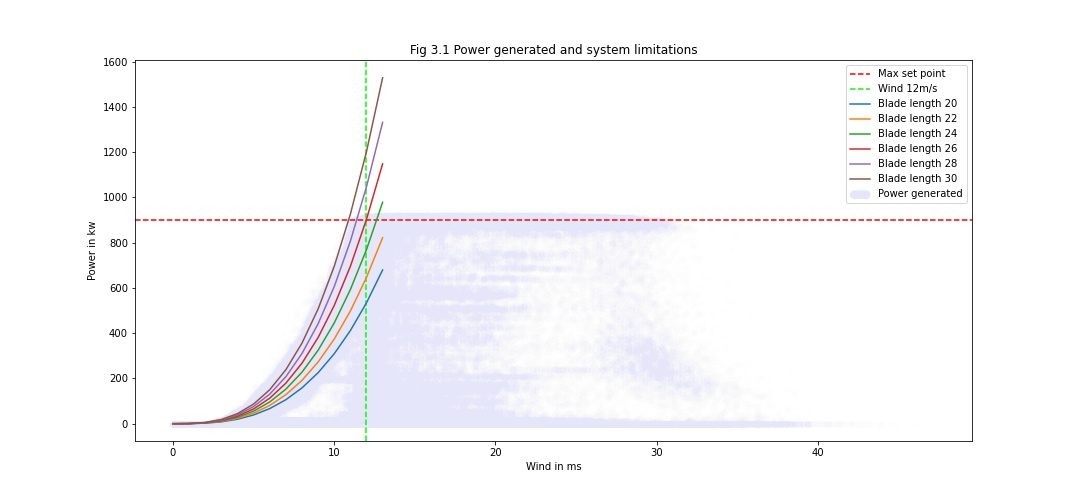

## 3.2.2 Curtailed power (kW)

#### What is curtailed power?
In layman's word with drawing analogy from water usage, power is water flow rate or $how\ strong$ water current is while energy is $how\ much$ water used, stored, and collected. So prior to calculating curtailed energy, we need to calculate curtailed power at first.

Curtailed power in wind turbine business is unused hidden capacity which cannot be used unfortunately. It could happen anytime because of random feature of mother nature and power balance between local grid demand and potential power. If wind velocity is high enough, potential power becomes 900kW, but if power demand is very low for some reason, a grid control center will send a command of lowering setpoint of the turbines to match the generation and consumption at point in time. Therefore, gap (or residual capacity) between potential power and setpoint is considered as curtailed power.  

#### Curtailed power equation
Curtailed power (kW) = Potential power (kW) - Setpoint (kW)

,where Potential power (kW) in terms of single turbine = 0.5 x 1.23 x (pi x 26^2) x wind speed^3 x 0.4 / 1000

In this case study, because setpoint of the turbine indicates whether the turbine is being forcibly curtailed by the setpoint commanded by the network operator, we used the above formula. 

Another alternative we conceived in the early stage of the study was: Curtailed power(kW) = Potential power kW - Total power generated (Power_kw). But considering that transient data were included in the turbine telemetry dataset, which could result in either overestimation or underestimation of the curtailment, we adopted the above formula.

## 3.2.3 Curtailed energy (kWh)

#### What is curtailed energy?
It stands for how $much$ energy was actually curtailed. We are interested in curtailed energy, not curtailed power because electricity provider charge us in terms of energy, not power.

- Energy: aggregate to area in time chart

#### Curtailed energy equation
Curtailed energy in one minute (kWh) = curtailed power(kW) x 0.278 x 10^-3 (=1hour/3600sec) x 60sec

Since energy is accumulation of every instant value of power, mathematically integral of power or calculating area under power curve, curtailed energy needs to be aggreagated from curtailed power. As the original turbine telemetry dataset stores operating data at 1-minute interval, curtailed energy is at first accumulated for one minute which means that a certain curtailed power at a certain time is interpreted as it lasted for one minute. The simplest understanding of the conversion is that curtailed power(kW) x 1hour is expected amount of curtailed energy(kWh) in 1 hour if the instant value does continulusly last for 1 hour, but here we want to calculate more granular curtailed energy of 60seconds, therefore, it is divided by 3600sec and multiplied back by 60seconds to make it 1-minute accumulated curtailed energy. Then the 1-minute curtailed energy can be used for further sum to 1month, 1year curtailed energy for the purposes of the analysis.     

## 3.2.4 Curtailment computation
Data used:
- df_supply: Drop all NA and Power_kw > Setpoint_kw
- Energy supply and demand should be quite constant in particular months across year, summer months should have less wind than winter months. Therefore, it is alright to have different years of supply and demand data, we can take the averages by months regardless year for curtailment calculation when needed.

A new dataset created (df_curtail) with below columns:
- Timestamp: the datatime in UTC of the measurement (the timestamp is situated at the end of the measurement period)
- Power_kw: average power in kW during the measurement period
- Setpoint_kw: the mean maximum-allowed generator output during the measurement period
- Wind_ms: mean wind speed at the turbine during the measurement period.
- Potential_power_kw: potential energy of single turbine = 0.5 x 1.23 x (pi x 26^2) x wind speed ^3 x 0.4 / 1000
- Curtailed_power_kw: potential power - Setpoint_kw 
- Curtailed_energy_in_1_minute_kwh:	Aggregated power for 1 minute with " curtailed power(kW) x 0.278 x 10^-3 x 60sec ". 

## 3.3 OLS regression

Dudley L. Poston Jr stated that 'Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line. In this entry, OLS regression will be discussed in the context of a bivariate model, that is, a model in which there is only one independent variable ( X ) predicting a dependent variable ( Y ).' (Dudley L. Poston Jr, n.d. [[11]](#OLS))

If we could build a Setpoint or Curtailment prediction model using OLS regression, we could predict curtailed energy and build a business model on rolling basis. 

We tried to find a meaningful pattern when the curtailed energy likely to happen, however, it turned out that there is no strong correlation among candidate variables. It is considered that lower setpoint takes place at random rather than at certain seasonal or hourly pattern. In other words, the curtailed energy is available any month sufficiently covering potential increased demand for a proposed business case later. 

# 4. Results <a class="anchor" id="results"></a>

### 4.1.1 Low demands
In general, most households need 0.2-0.3kW and around 0.1 kW per minute throughout the year. Two dinstinct level of demands could possibly due to demands during different hours in a day. During midnights, 0.1kW demand becuase they're sleeping. While during dinner time that everyone back to home after work or school, 0.2-0.3kW needed for meals preparation, heaters, lights and hot water etc. 

From below figure (Fig 4.1), it shows that demand in Jan (coldest days in winter) is highest, and dropped constantly until Jul and Aug (hottest days in summer), then rose again and reached highest in Jan. The higher electricity demand could be related to more heating needs during cold hours.

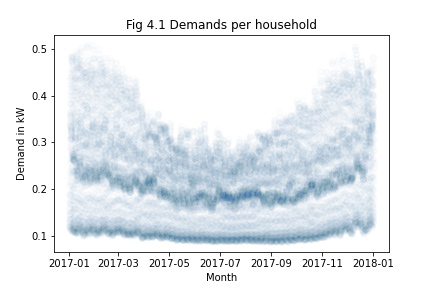

Monthly demand per household (Fig 4.2) is the highest in Winter (over 200 kWh) and lowest in Summer (less than 140 kWh). This again, is reasonable due to more electricity for lightings or heatings during winter.

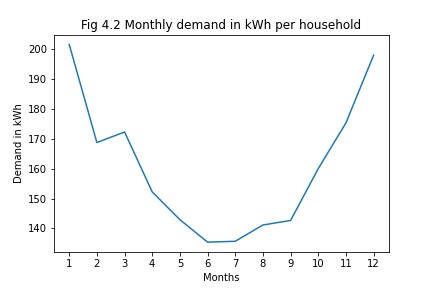

#### 4.1.1.1 Average demand in Scotland
Below table (Jon Davies, 2019 [[1]](#average-electricity-gas-bills-in-2019)) average Energy Monthly Consumption in Scotland was 308kWh as shown in this table:
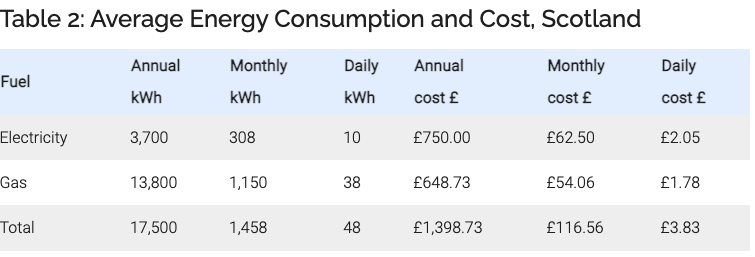

which is about 2 times more than Orkney average electricity demands:

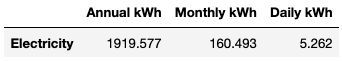

### 4.1.2 Windiest parts in the UK thus causing more curtailment

According to Metoffice statistics (Met Office, n.d. [[2]](#windiest-parts-of-UK)), Orkney is one of the top windiest parts in the UK.

Fig 4.3 show that curtailment happens most between wind speed 7-25m/s. The pie chart in Fig 4.4 shows that 66% of data is within that range. 

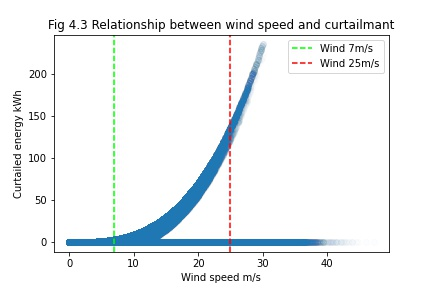

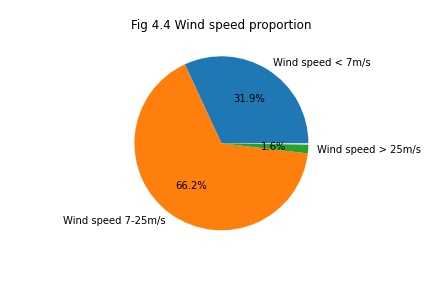

### 4.1.3 Power usage and generation pattern 

#### 4.1.3.1 Average Wind speed pattern:

1. Winter (Nov - Feb): highest
2. Summer (May - Aug): lowest
3. Spring and Autumn: moderate
4. Not much differences in terms of hours

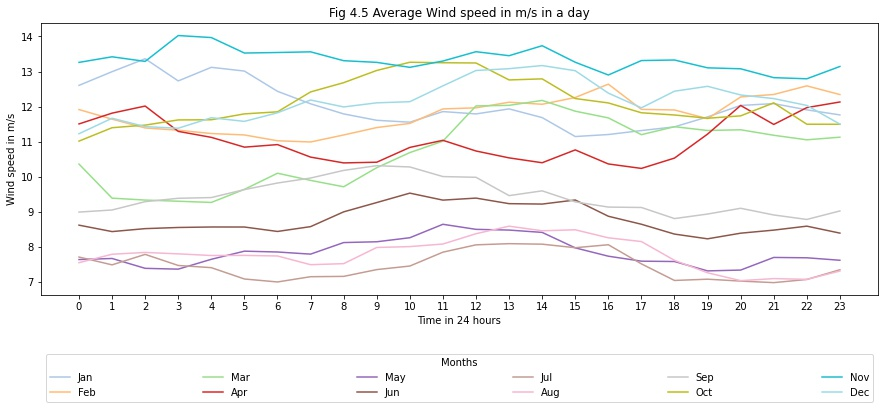

#### 4.1.3.2 Average Demand pattern:

1. 0am-5am: low, sleeping
2. 5am-7am: start rising coz time to wakeup
3. 7am-3pm: constant coz people in office/ school, maybe just one person at home watching TV or doing houseworks.
4. 3pm-5pm: rise, peak at 5pm. People off work/ school, back to home and start using electricity like TV, computer, lights.... Winter time has higher peak beacuase the period is colder which we use more heaters, and dark earlier thus use light earlier, therefore draw a higher demand during 5pm-11pm
5. 6pm-11pm dropping: Night life outside, time to sleep

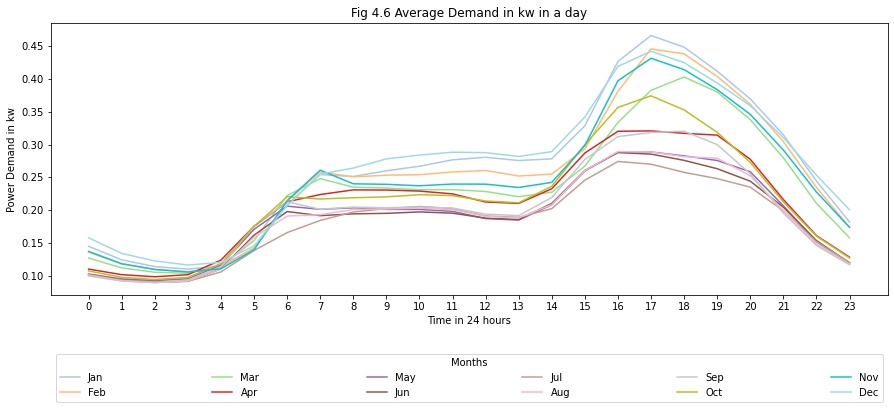

#### 4.1.3.3 Average Curatiled energy:
Below two figures show that during Dec to Feb, curtailment occurs least. In winter, setpoint was probably set to 900kW in most days to support extra heating or lighting usages.

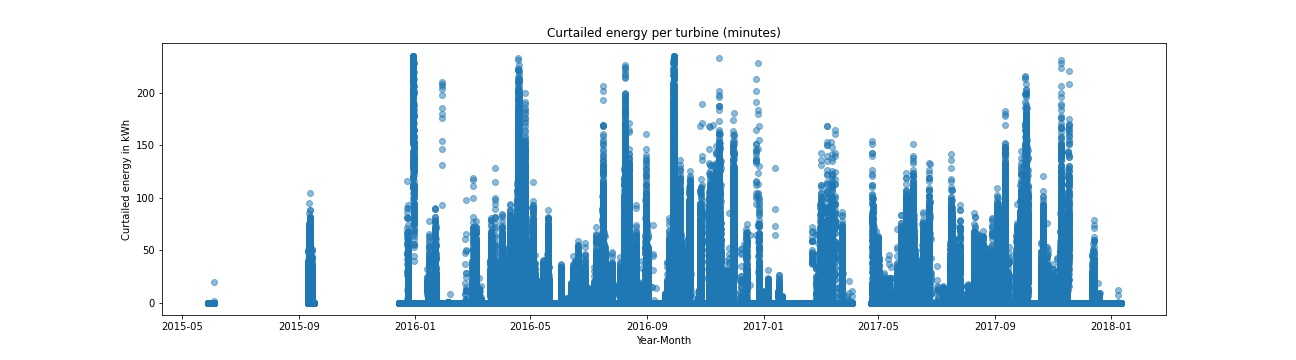

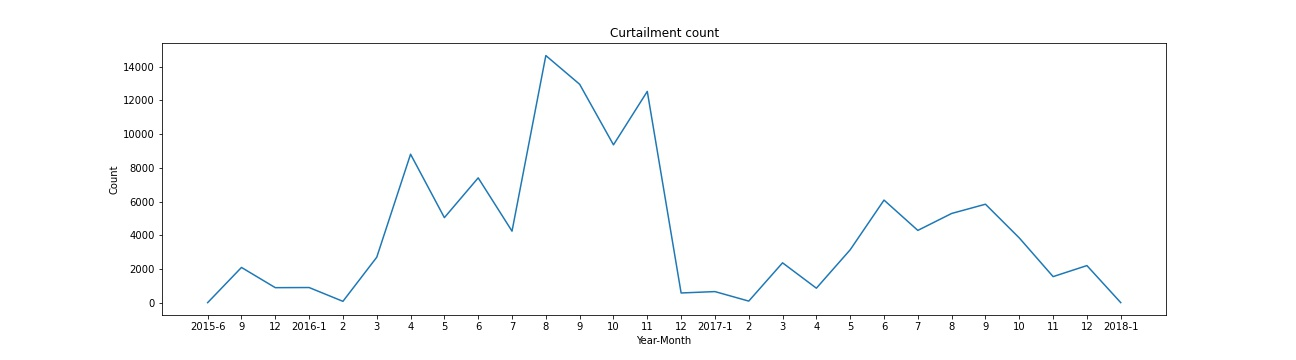

As shown in Fig 4.7, we don't see any obvious pattern across the year, which is as expected because curtailed energy is calculated from potential power and power generated which is affected by both demand and wind speed, and also other factors suc as power loss which was not recorded. This rejected our hypothesis (7).

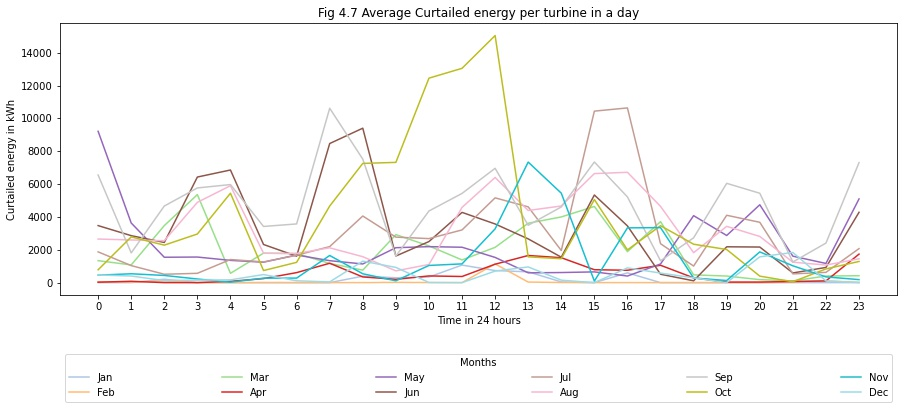

Drilled down into more details in a month, for intances Jan below, constant wind speed with increase demand not necessary cause decrease in curtailed energy, such as 15:00-16:00, it gives increased curtailed energy. Also, during 8:00-9:00, both wind speed and demand were constant, but curtailed energy dropped significantly. There's no significant impact of wind speed and demand on curtailed energy.

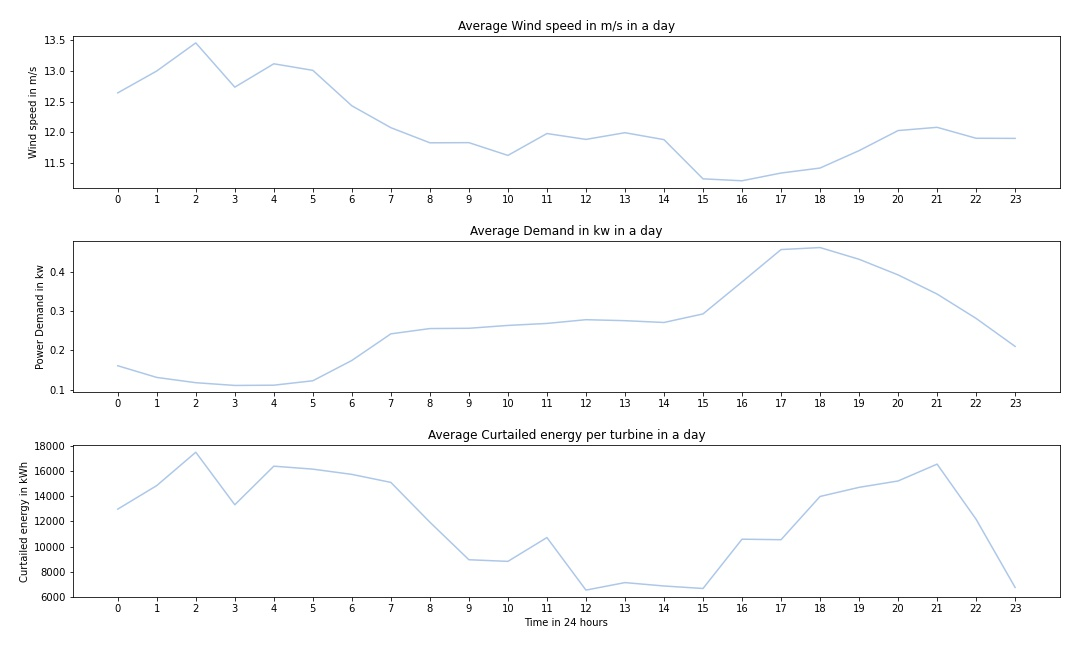

### 4.1.4 No significant impact of wind speed and demand on Setpoint
Our hypothesis of impact of wind speed and demand on Setpoint is rejected by below findings.

As shown Fig 4.8, Setpoint only highly correlated with curtailed power attributes, which as for sure because curtailed attributes are calculated by Potential power - setpoint. Other than curtailed power attributes, setpoint doesn't have high correlation with any attributes such as wind speed and demand as stated in hypothesis. In fact, their correlation is quite weak which rejected our hypothesis.

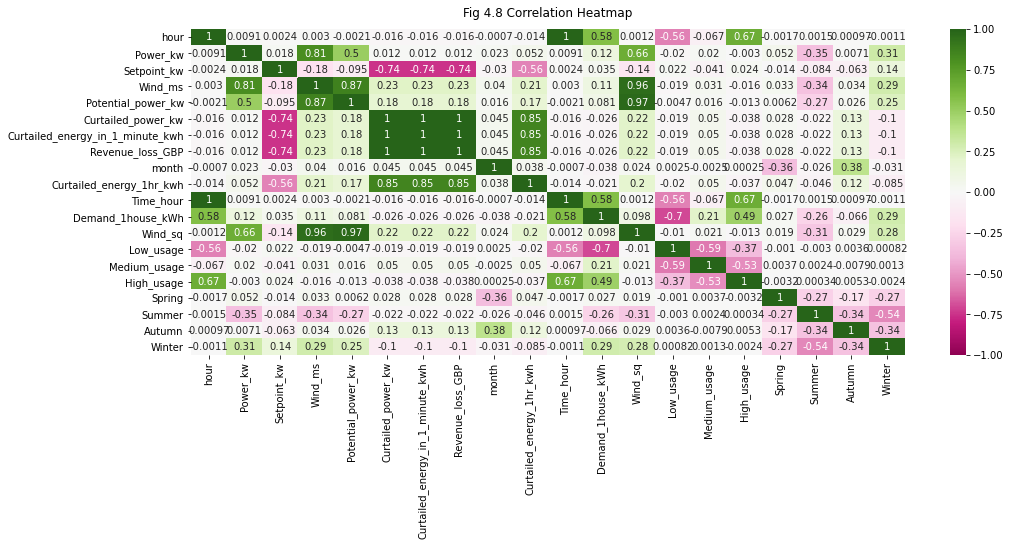

### 4.1.5 How much energy is currently curtailed annually across the Orkney Isles? 

Annual curtailment of 500 wind turbines was 629GWh and 301GWh in 2016 and 2017 respectively. This matches with our hypothesis 1 (There is sizable wasted power due to curtailment). The massive curtailment caused averagely 75+ millions GBP revenue loss annually. 


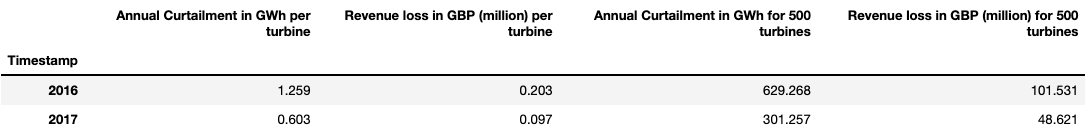

2017 values were half of 2016's. This huge differences could due to 
1. Uncertainties in wind speed as we couldn't expect what happens in the nature
2. Somehow more usages in 2017 so actually generated more power
We couldn't foresee whether in the next few years it is continue to drop due to reason 2, or have ups and downs due to reason 1, so we choose to take the average value as denominator in calculation of percentage of curtailed energy in 5.5 analysis.

# 5. Discussion <a class="anchor" id="discussion"></a>

## 5.1 Summary of the overall trend of the findings
From the results, electricity demand is 2 times lower than Scotland average, residents probably use more power sources other than electricity. The high average wind speed plus such a low electricty demand causes high curtailment thus high revenue loss. 

## 5.2 Was the initial hypothesis correct?
The initial hypotheses about size of curtailment and wind condition is correct. Due to the geographical location, Orkney is the number 2 windiest part of the UK, 67% of the records were more than 7m/s. 

However, the correlation of wind speed and demand on curtailed power or setpoint are insignificant. Through the heatmap in 4.1.4, we observed that the correlation index between these are very insignificant i.e. very close to 0. Possible reasons are uncertainties of nature or manual intuitive control on setpoint level.

## 5.3 An explanation of any errors
Any errors that were seen as part of applying the analysis were resolved by either replacing any missing values in the attributes with the appropriate replacements, or by dropping the records with missing values. Thus, no errors are currently present in the codes given in the Appendix section.

## 5.4 Strengths and Limitations of the Analysis
Strengths
1. The original data sets are clean and accurate enough with not much huge impact outliers. Without much data cleaning, an accurate business model could be derived.
2. Daily electricity demands were so low that we could be quite sure that residents were using very much other energy resources, thus we've opportunities to shift energy usage to green wind energy with high discount value.

Limitations
1. Temperature or more weather records could be included for more correlation analysis and model prediction of setpoint and curtailment. With a precise model, it would be much easier to predict seasonal curtailment and create even better penetration plan base on different seasons.

## 5.5 How much can this be reduced by different levels of DR penetration? How many local households would need to be on our DR scheme in order to supply this level of DR?

We have 22,000 total households on Orkney as of 2017 (National Records of Scotland, n.d. [[8]](#Orkney-pop)), so the maximum households we can penetrate DR to is 22,000. In the trial period, we may want to start with fewer households i.e. 30 first to see if the DR devices cost could be covered in a few years.

Below table shows the average energy consumption and cost at Scotland (Jon Davies, 2019 [[1]](#average-electricity-gas-bills-in-2019)) :
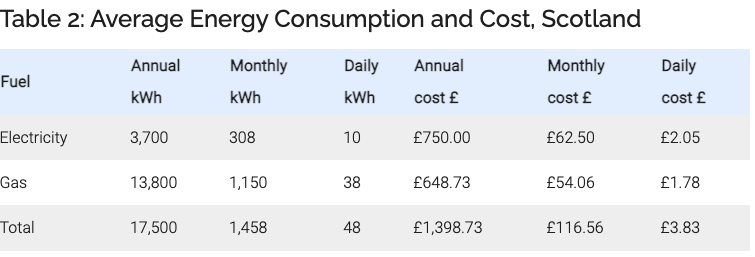

The average electricity monthly demand in Scotland is 308kWh, while Orkney was half of that (148kWh). The total energy consumption per household should not vary that much, therefore Orkney residents might be using far more gas than Scotland average. After installing DR devices, we could expect increase in demand to meet the average, and possibly also shift some gas usage to electricity, with the total overall energy usage unchanged. 

Assume that all curtailed energy were first stored, and households appliances are connected to these devices to get curtailed energy, so the summer curtailed energy are stored to support households usage during winter.

We have several choices of power storage installation:
1. Battery storage for electricity energy:
    - CSE stated that 'On average installing a battery will cost £4,000-£8,000, with a useable capacity of 3.8-13.5 kWh' (CSE, n.d. [[3]](#avg-battery-storage-price)). Assume that to support daily usage of 5kWh (Orkney daily average) or 10kWh (Scotland daily average), we need a £5,000 or £6,500 battery storage respectively.
    
2. Storage heater to replace gas:
    - The storage capacity of a storage heater (Dimplex, n.d. [[4]](#storage-heater)) is 15.54kWh which can cover daily usage, costs £858.10. 
    - The energy needed exceeds daily average of demand per household 4.869kWh, so probably residents are using gas for heater, thus installing this could shift their energy usage from gas to wind. 

3. Hot water tank to replace gas:
    - A shower uses 8 litres per minute on average (CCW, n.d. [[5]](#shower-water-usage)). Assuming that all households have 3 residents, each of them take 10 minutes for a shower, they need 240 litres of hot water for shower per day. 240 litres of hot water needs 12.5kWh energy per day (Sust-it, n.d. [[6]](#water-heater-energy-calc)). 
    - A 210Ltrs 6kW immersion water heater (Shop4, n.d. [[7]](#water-heater)) costs £ 1,117.42. 
    - The energy needed for shower is 12.5kWh, which exceeds the daily average of demand per household 4.869kWh, so probably residents are using gas for hot water, thus installing this could shift their energy usage from gas to wind. 

##### How much gas could be shifted to wind energy through installing storage heater and hot water tank?
1. Assume storage heater annual usage 15.54kWh x 30 x 4 = 1864.8kWh (4 months winter usage)
2. Assume annual hot water usage 12.5kWh x 365 = 4562.5kWh
3. The ballpark allowable gas shift is (1864.8 + 4562.5)/13800 = 46.6%

We could also consider applying government subsidies on initial systems setup costs because our project helps carbon emission reduction which is one of the main focuses in upcoming decades. Therefore, for each of the below cases, we also have a subplan that include 10% government subsidy. 10% government subsidy is expected if successful because the UK number of CO2 in tons emission costs about 0.0148 GBP /kWh. Since variable portion of electricity price is 0.1613 GPB/kWh, it is roughly 10% impact in revenue.

Therefore, curtailment could be reduced further and calculated in following cases:
1. Installing battery storage 
    - Consumed energy kWh = Number of households x Orkney annual demands
2. Installing battery storage
    - Consumed energy kWh = Number of households x Scotland annual electricity demands
3. Installing battery storage + storage heater + hot water tank
    - Consumed energy kWh = Number of households x (Scotland annual electricity + 46% gas demands)
4. Installing storage heater + hot water tank
    - Consumed energy kWh = Number of households x Scotland annual 46% gas demands
    
After DR rollout and if proved demand could increase after 1 year trial, we could start charging customers. If the cost could be compensated within 6 years of trial (5 years after charging), we'll go for the plan. 6 years as the cut off point because we don't want to risk for the cost of appliances maintenance. Gas and electricity cost the same (Switch Plan, 2021 [[9]](#Orkney-power-costs)).

### 5.5.1 Plan A: installing battery storage, based on Orkney eletricity demand
This is not profitable in 6 year, we don't suggest this direction.

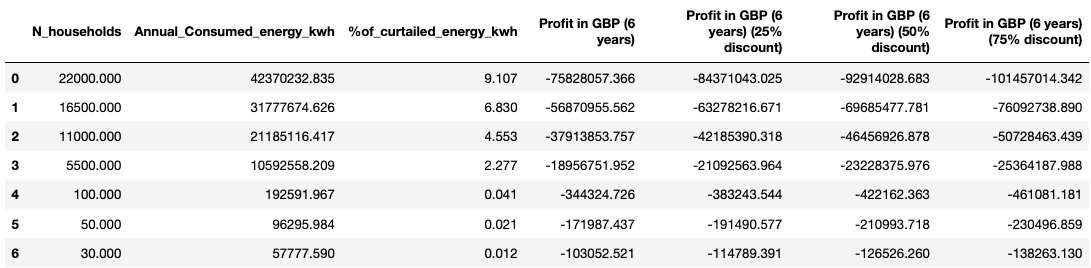

#### Plan A With 10% government subsidy
This is not profitable in 6 year, we don't suggest this direction

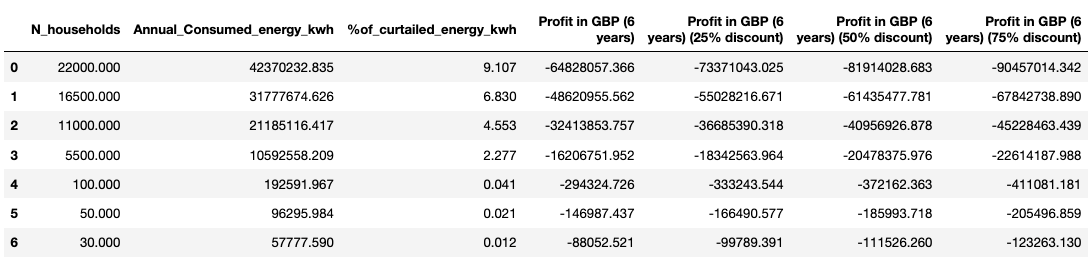

### 5.5.2 Plan B: installing battery storage, based on Scotland electricity demand 
This is not profitable in 6 year, we don't suggest this direction.

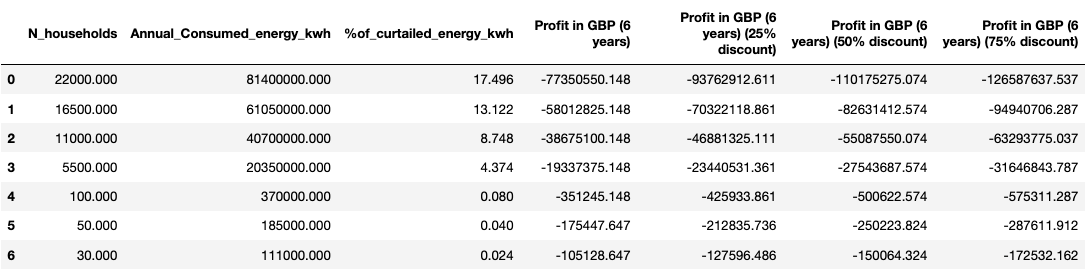

#### Plan B with 10% government subsidy
This is not profitable in 6 year, we don't suggest this direction.

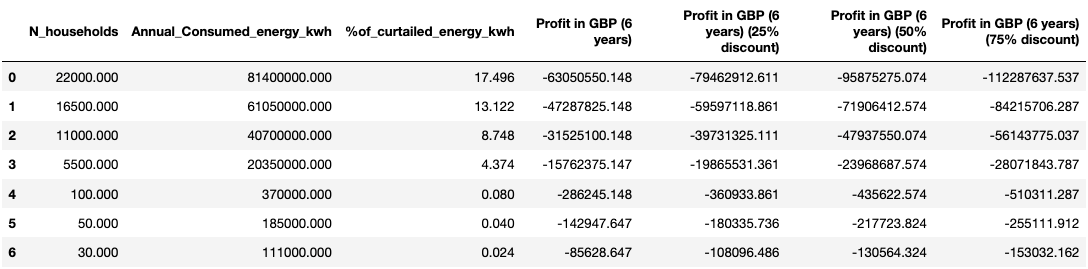

### 5.5.3 Plan C: installing battery storage + storage heater + hot water tank, based on Scotland electricity + 46% gas demand 
This is not profitable in 6 year, we don't suggest this direction.

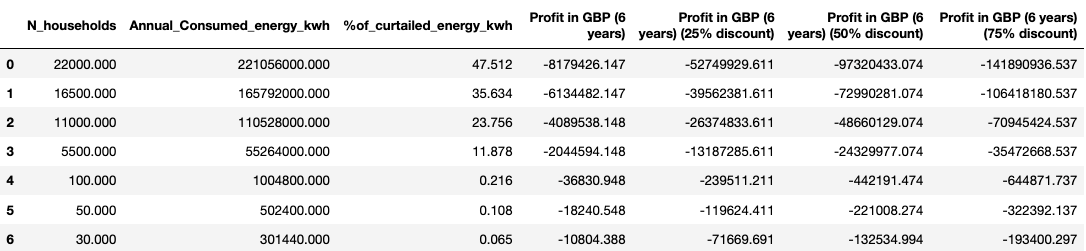

#### Plan C with 10% government subsidy
Although profitable in 6 years, we don't suggest this direction because not attractive with full charge.

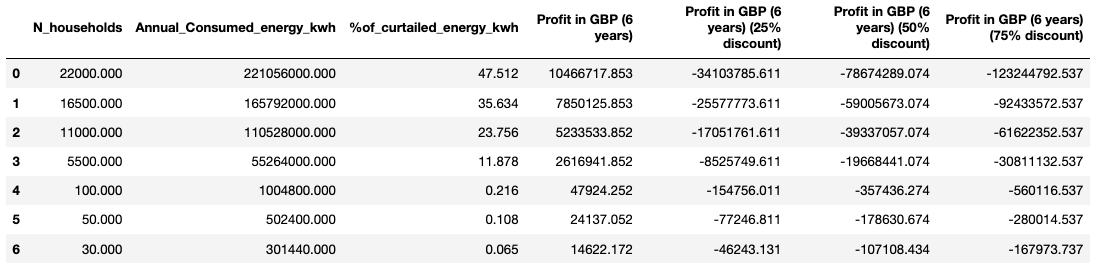

### 5.5.3 Plan D: installing storage heater + hot water tank, based on Scotland 46% gas demand 
Among all four plans, this is the only plan that is profitable in 6 years, and can do even with 50% discount. With higher discount value, more households are willing join the program. Therefore, in the DR trial, we should target to replace at least 46% gas demands by installing storage heater with 15.54kWh capacity, and 210Ltrs 6kW hot water tank, with total cost per household around £1,975.52. Once we proved during trial period of 30 households demands increased and consumed expected amount of energy, we could rollout this plan to more households to use up more curtailed energy. This supports our hypothesis (3).

Moreover, even if DR penetrates into all residents (22000 households), the total consumed energy is just 30% of annual curtailed energy. Because our estimation is based on 3 households home size, and each house install just one of each appliances, we could further increase the energy usage by installing more or bigger capacity appliances in one house according to their real usage after proving that customer demand do increase through our trial. 

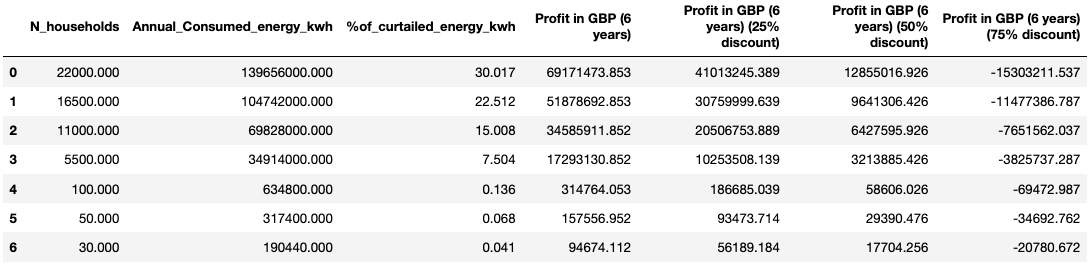

#### Plan D with 10% government subsidy
Plan D is the best plan, and could be even better if the government could sponsor 10% costs.

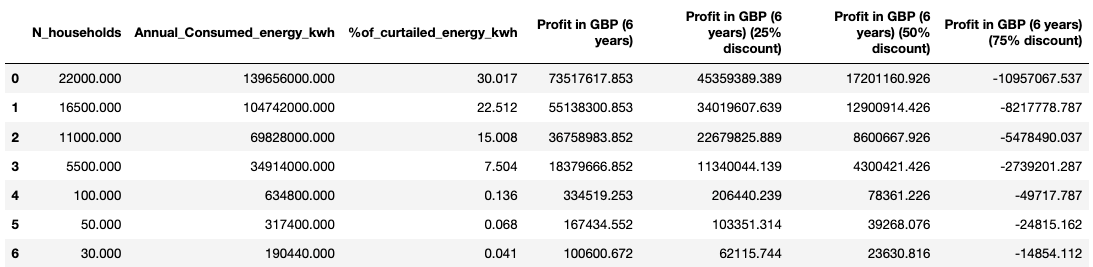

# 6. References <a class="anchor" id="references"></a>

<a id='average-electricity-gas-bills-in-2019'></a>
1. Jon Davies. (2019) Average Electricity & Gas Bills In 2019. Available from: https://great-home.co.uk/average-electricity-gas-bills-in-2019/ [Accessed 5th Sep 2021]
<a id='windiest-parts-of-UK'></a>
2. Met Office. (n.d.) Where are the windiest parts of the UK. Available from: https://www.metoffice.gov.uk/weather/learn-about/weather/types-of-weather/wind/windiest-place-in-uk[Accessed 5th Sep 2021]
<a id='avg-battery-storage-price'></a>
3. CSG. (n.d.) Installation and return on investment. Available from: https://www.cse.org.uk/advice/renewable-energy/battery-storage [Accessed 9th Sep 2021]
<a id='storage-heater'></a>
4. Dimplex. (n.d.) Quantum HHR Storage Heater. Available from: https://www.dimplex.co.uk/product/quantum-hhr-storage-heater [Accessed 9th Sep 2021]
<a id='shower-water-usage'></a>
5. CCW. (n.d.) Shower. Available from: https://www.ccwater.org.uk/households/using-water-wisely/averagewateruse/ [Accessed 9th Sep 2021]
<a id='water-heater-energy-calc'></a>
6. Sust-it. (n.d.) Electric Immersion Water Heater Running Costs Calculator. Available from: https://www.sust-it.net/immersion-heater-energy-calculator.php [Accessed 9th Sep 2021]
<a id='water-heater'></a>
7. Shop4. (n.d.) Heatrae Sadia 95.050.468 Megaflo Eco 210DD White Stainless Steel Direct Unvented Cylinder Style Water Heater With 2 x 3kW Immersion Elements 210Ltrs 6kW. Available from: https://www.shop4-waterheaters.co.uk/product.php/393405286/heatrae_sadia_95_050_468_megaflo_eco_210dd_white_stainless_steel_direct_unvented_cylinder_style_water_heater_with_2_x_3kw_immersion_elements_210ltrs_6kw?search_query=Megaflo+210+ltrs&results=75 [Accessed 9th Sep 2021]
<a id='Orkney-pop'></a>
8. National Records of Scotland. (n.d.) Total population, Orkney Islands, 1998-2019. Available from: https://www.nrscotland.gov.uk/files/statistics/council-area-data-sheets/orkney-islands-council-profile.html#table_pop_est [Accessed 9th Sep 2021]
<a id='Orkney-power-costs'></a>
9.  Switch Plan. (2021) Scottish Power plans and tariffs in Orkney. Available from: https://www.switch-plan.co.uk/suppliers/scottish-power/orkney/ [Accessed 5th Sep 2021]
<a id='wind-turbine-calculation'></a>
10. The Royal Academy of Engineering. (n.d.) Wind Turbine Power Calculations RWE npower renewables. Available from: https://www.raeng.org.uk/publications/other/23-wind-turbine [Accessed 30th Aug 2021]
<a id='OLS'></a>
11. Dudley L. Poston Jr. (n.d.) Ordinary Least Squares Regression. Available from: https://www.encyclopedia.com/social-sciences/applied-and-social-sciences-magazines/ordinary-least-squares-regression [Accessed 11th Sep 2021]

# 7. Appendix <a class="anchor" id="appendix"></a>

## 7.1 Data import

### 7.1.1 Importing residential_demand.csv 
The dataset residential_demand.csv is successfully imported and named df_demand. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# stop warning messages
import warnings
warnings.filterwarnings('ignore')

# show full number, not scientific
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df_demand = pd.read_csv('residential_demand.csv',parse_dates=['Timestamp'], infer_datetime_format= True)
df_demand.head(3)

Timestamp  Demand_mean_kw  N_households
0 2017-01-01 00:00:00           0.220          5428
1 2017-01-01 00:30:00           0.206          5429
2 2017-01-01 01:00:00           0.189          5429

In [3]:
# To check any null data
df_demand.isnull().describe()

Timestamp Demand_mean_kw N_households
count      17568          17568        17568
unique         1              1            1
top        False          False        False
freq       17568          17568        17568

In [4]:
# To check any 0 data
df_demand.describe()

Demand_mean_kw  N_households
count       17568.000     17568.000
mean            0.219      8630.642
std             0.090      2999.142
min             0.087      5406.000
25%             0.144      6781.000
50%             0.212      8190.500
75%             0.274      9652.000
max             0.510     30037.000

### 7.1.2 Importing turbine_telemetry.csv
The wind turbine power generation dataset turbine_telemetry.csv is imported and named df_supply.

In [5]:
df_supply = pd.read_csv('turbine_telemetry.csv',parse_dates=['Timestamp'], infer_datetime_format= True)
df_supply.head(3)

Timestamp  Power_kw  Setpoint_kw  Wind_ms
0 2015-05-28 00:00:23    80.000      900.000    4.900
1 2015-05-28 00:01:23    78.000      900.000    5.400
2 2015-05-28 00:02:23    52.000      900.000    4.900

In [6]:
# To check any null data
# 2 unique values mean True and False exists in checking null, thus null exists.
df_supply.isnull().describe()

Timestamp Power_kw Setpoint_kw  Wind_ms
count    1069636  1069636     1069636  1069636
unique         1        2           2        2
top        False    False       False    False
freq     1069636  1066934     1066921  1066931

In [7]:
# To check any 0 data shown
# Min get a zero value means 0 data exists.
df_supply.describe()

Power_kw  Setpoint_kw     Wind_ms
count 1066934.000  1066921.000 1066931.000
mean      367.187      810.658       9.955
std       339.964      261.507       5.454
min         0.000        0.000       0.000
25%        51.000      900.000       6.100
50%       251.000      900.000       9.000
75%       704.000      900.000      12.400
max       938.000      900.000      47.200

## 7.2 Visualising raw data see any obvious trends or missing data

### 7.2.1 Households demands (df_demand)

In [8]:
# Becuase the recorded time is the end of the time, Timestamp -1s to correct the hour of measurment
df_demand.Timestamp = df_demand.Timestamp - dt.timedelta(seconds=1)

# Becuase 2016 only have one data, we ignore this.
df_demand = df_demand[df_demand.Timestamp.dt.year != 2016]
df_demand.head(3)

Timestamp  Demand_mean_kw  N_households
1 2017-01-01 00:29:59           0.206          5429
2 2017-01-01 00:59:59           0.189          5429
3 2017-01-01 01:29:59           0.173          5429

<AxesSubplot:xlabel='Timestamp,Timestamp'>

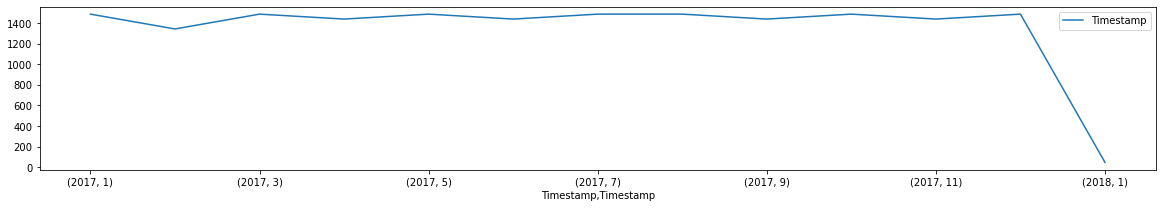

In [9]:
# check if number of data is constant in all months
# constant in all months except 2018. So we'll ignore 2018 in analysis.
df_demand.groupby([df_demand.Timestamp.dt.year,df_demand.Timestamp.dt.month]).count().iloc[:,:1].plot(figsize=(20,3))

In general, most households need 0.2-0.3kW and around 0.1 kW per minute throughout the year. Two dinstinct level of demands could possibly due to demands during different hours in a day. During midnights, 0.1kW demand becuase they're sleeping. While during dinner time that everyone back to home after work or school, 0.2-0.3kW needed for meals preparation, heaters, lights and hot water etc. 

From below figure, it shows that demand in Jan (coldest days in winter) is highest, and dropped constantly until Jul and Aug (hottest days in summer), then rose again and reached highest in Jan. Higher electricity needs could be related to  heater operations during cold hours.

Monthly demand per household is the highest in Winter (395kW) and lowest in Summer (270kW, 32% less). This again, is reasonable due to more electricity for heaters and lightings required during winter.

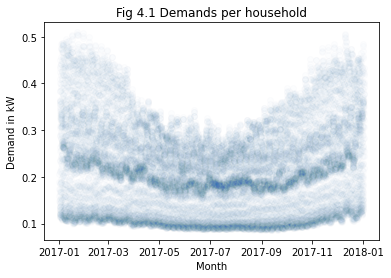

In [10]:
plt.scatter(df_demand['Timestamp'] , df_demand['Demand_mean_kw'], alpha=0.01)
plt.title('Fig 4.1 Demands per household')
plt.xlabel('Month')
plt.ylabel('Demand in kW')

plt.savefig('./img/Fig 4.1 Demands per household scatter.jpg')
plt.show()

In [11]:
print('Average demand during 0am-5am: ',df_demand[df_demand.Timestamp.dt.hour.isin(np.arange(0,6))].mean()[0])
print('Average demand during 6am-7am: ',df_demand[df_demand.Timestamp.dt.hour.isin(np.arange(6,8))].mean()[0])
print('Average demand during 8am-3pm: ',df_demand[df_demand.Timestamp.dt.hour.isin(np.arange(8,16))].mean()[0])
print('Average demand during 4pm-5pm: ',df_demand[df_demand.Timestamp.dt.hour.isin(np.arange(16,18))].mean()[0])
print('Average demand during 6pm-11pm: ',df_demand[df_demand.Timestamp.dt.hour.isin(np.arange(18,24))].mean()[0])

Average demand during 0am-5am:  0.11690719932291514
Average demand during 6am-7am:  0.21526142114697733
Average demand during 8am-3pm:  0.2338015407337872
Average demand during 4pm-5pm:  0.3497033189065092
Average demand during 6pm-11pm:  0.2594064493140798


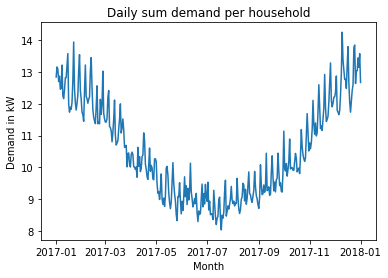

In [12]:
# daily demand sum
df_demand.groupby(df_demand.Timestamp.dt.date).sum()['Demand_mean_kw'].plot()
plt.title('Daily sum demand per household')
plt.xlabel('Month')
plt.ylabel('Demand in kW')

plt.show()

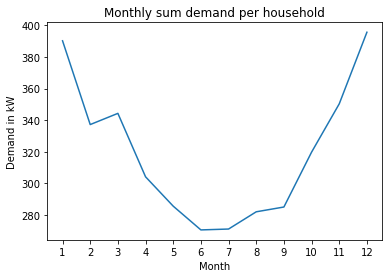

In [13]:
# monthly demand sum
df_demand.groupby(df_demand[df_demand.Timestamp.dt.year == 2017].Timestamp.dt.month).sum()['Demand_mean_kw'].plot()
plt.xticks(range(1,13))
plt.title('Monthly sum demand per household')
plt.xlabel('Month')
plt.ylabel('Demand in kW')

plt.show()

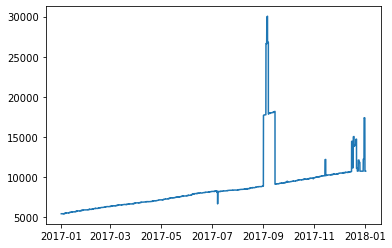

In [14]:
plt.plot(df_demand['Timestamp'] , df_demand['N_households'])

<AxesSubplot:ylabel='N_households'>

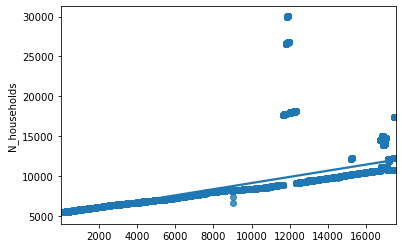

In [15]:
sns.regplot(df_demand.index , df_demand['N_households'])

#### These 4 spikes / outliers data of number of households:
1. Number of households <8000 in 2017-07
2. Number of households >15000 in 2017-09
3. Number of households >10500 in 2017-11
4. Number of households >11000 in 2017-12

But since the number of households are just sample data who participtated in the survey, as long as the average demand has no out liers, the dataset is good to use. We can also assume that total number of households in 2017 is 22,000 on the island according to the governement figure (National Records of Scotland, n.d. [[8]](#Orkney-pop)) and use this figure for our analysis.

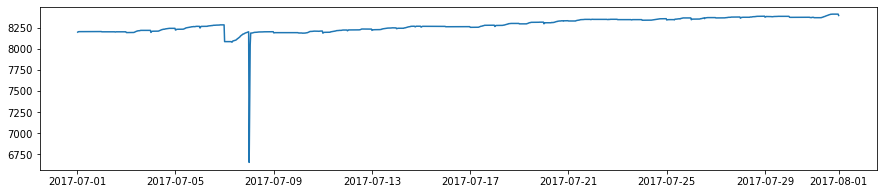

In [16]:
n=7
plt.figure(figsize=(15,3))
plt.plot(df_demand[df_demand['Timestamp'].dt.month == n]['Timestamp'], df_demand[df_demand['Timestamp'].dt.month == n]['N_households'])

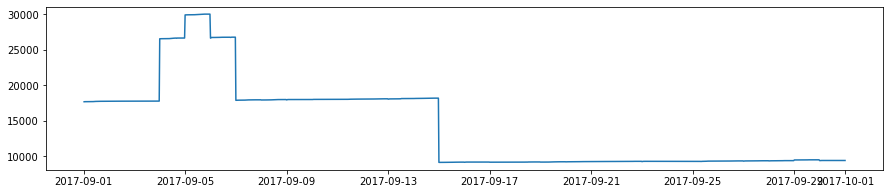

In [17]:
n=9
plt.figure(figsize=(15,3))
plt.plot(df_demand[df_demand['Timestamp'].dt.month == n]['Timestamp'], df_demand[df_demand['Timestamp'].dt.month == n]['N_households'])

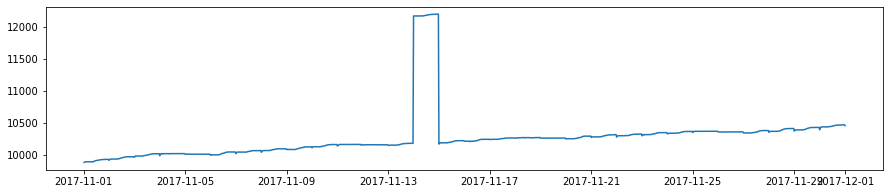

In [18]:
n=11
plt.figure(figsize=(15,3))
plt.plot(df_demand[df_demand['Timestamp'].dt.month == n]['Timestamp'], df_demand[df_demand['Timestamp'].dt.month == n]['N_households'])

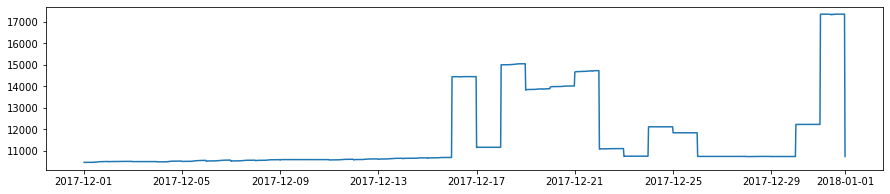

In [19]:
n=12
plt.figure(figsize=(15,3))
plt.plot(df_demand[df_demand['Timestamp'].dt.month == n]['Timestamp'], df_demand[df_demand['Timestamp'].dt.month == n]['N_households'])

## 7.2.2 Wind turbines generation (df_supply)

<AxesSubplot:xlabel='Timestamp,Timestamp'>

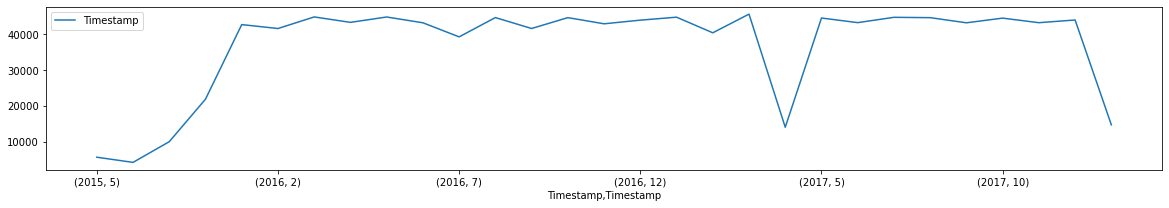

In [20]:
# check if number of data is constant in all months
# constant in all months except Apr 2017
df_supply.groupby([df_supply.Timestamp.dt.year,df_supply.Timestamp.dt.month]).count().iloc[:,:1].plot(figsize=(20,3))

Below we plotted the relationships between variables. The main findings would be some extra power generated beyound setpoint. Sometimes the setpoint is set to a lower point and the turbine should react accordingly, but the turbine can't stop immediately due to inertia. We'll still keep these records becuase these represent the actual power consumption. 

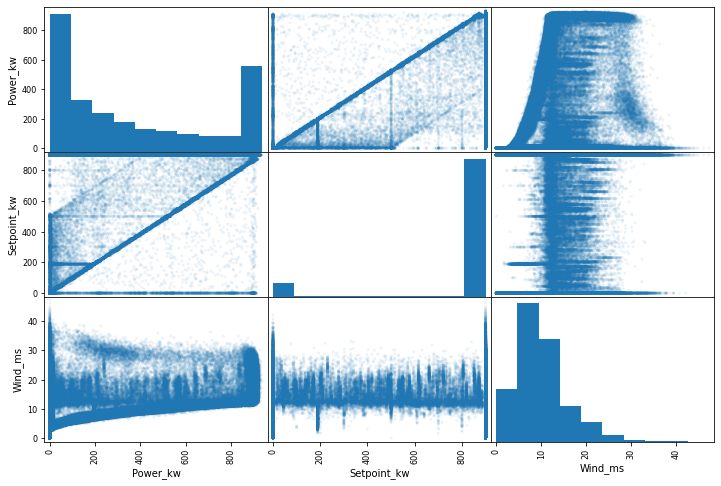

In [21]:
from pandas.plotting import scatter_matrix

#----------------------------------
#draw a scatterplot to look at the relationship of each variables
d=scatter_matrix(df_supply, figsize=(12,8),alpha=0.08)

Below scatterplot shows the power generation pattern. From the plot, we found missing data in 2015 and Apr 2017. In 2015, too few data for analysis so we'll simply drop all 2015 data in plotting some graphs later. Almost whole Apr 2017 data is missing, but since we have Apr 2016 data and the seaonsal pattern doesn't varies much, we could always choose to use 2016 data for the trend analysis when needed, therefore, the missing data won't pose huge problem on our analysis. Same case for missing data in Oct 2016.

Despite the missing data, it is observed that wind turbine generated 0-400 kW during summer (May - Sep) and 900 kW during winter (Nov-Feb). This matches with the demand pattern which has higher demand in winter and lower in summer.

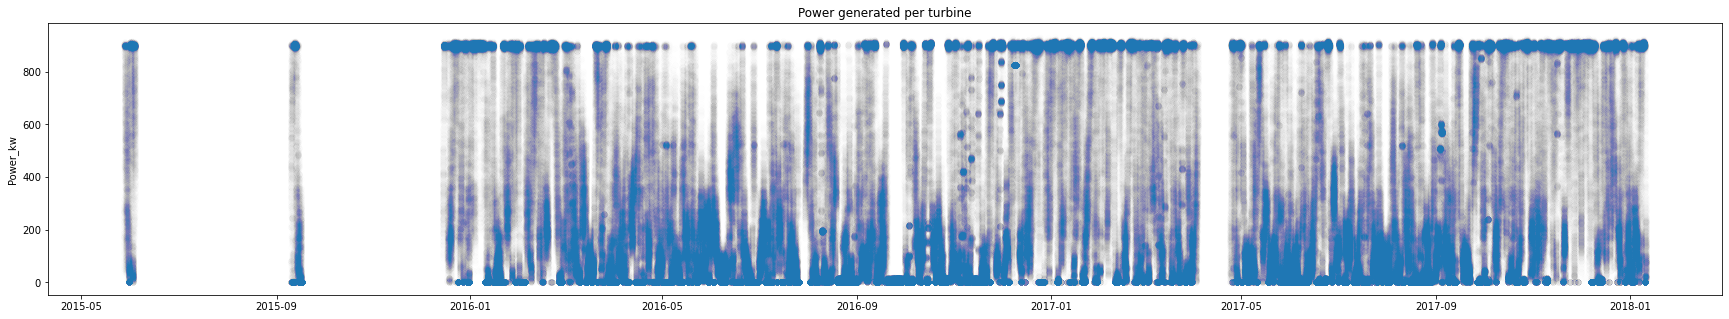

In [22]:
#----------------------------------
#draw a scatterplot to look at the power generation pattern

plt.figure(figsize=(30,5))
plt.scatter(df_supply['Timestamp'], df_supply['Power_kw'], alpha = 0.005)
plt.ylabel('Power_kw')
plt.title('Power generated per turbine')

plt.show()

Set point per turbine scatterplot below shows us that most of the time setpoint is 900kW. 

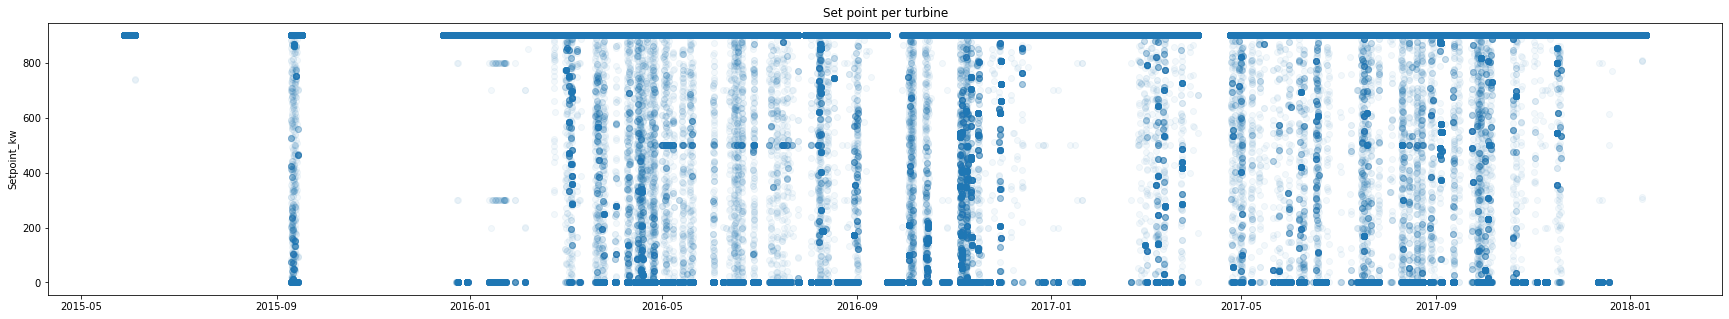

In [23]:
plt.figure(figsize=(30,5))
plt.scatter(df_supply['Timestamp'], df_supply['Setpoint_kw'], alpha = 0.05)
plt.ylabel('Setpoint_kw')
plt.title('Set point per turbine')

plt.show()

According to Metoffice statistics, Orkney is one of the top windiest parts in the UK. (Met Office, n.d. [[2]](#windiest-parts-of-UK))

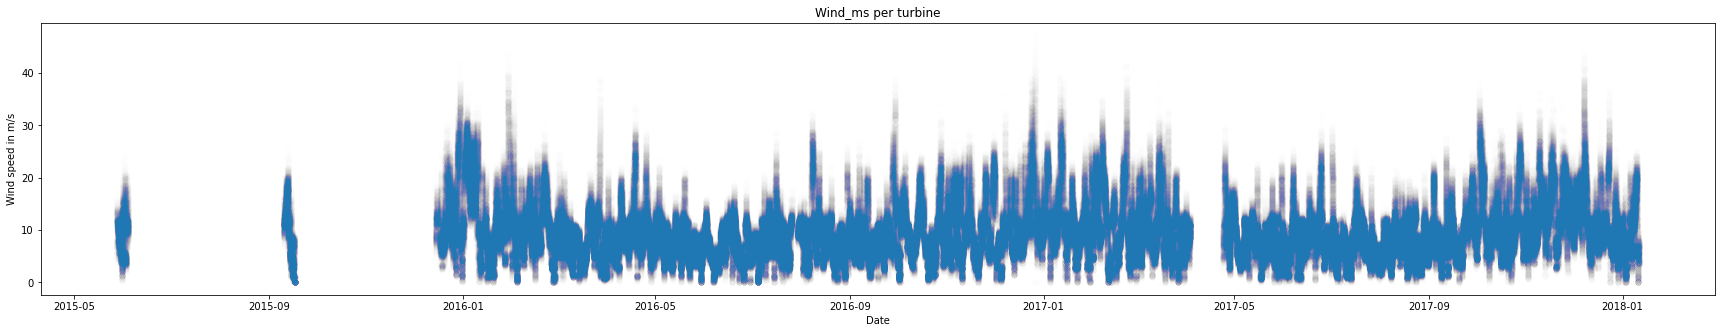

In [24]:
plt.figure(figsize=(30,5))
plt.scatter(df_supply['Timestamp'], df_supply['Wind_ms'], alpha = 0.003)
plt.xlabel('Date')
plt.ylabel('Wind speed in m/s')
plt.title('Wind_ms per turbine')

plt.show()

In [25]:
# 66% of record show wind speed >= 7m/s
tmp = pd.DataFrame(columns=['%'])
tmp.loc['Wind speed < 7m/s'] = len(df_supply[df_supply['Wind_ms'] < 7])/len(df_supply)
tmp.loc['Wind speed 7-25m/s'] = len(df_supply[df_supply['Wind_ms'] >= 7][df_supply['Wind_ms'] <= 25])/len(df_supply)
tmp.loc['Wind speed > 25m/s'] = len(df_supply[df_supply['Wind_ms'] > 25])/len(df_supply)

tmp

%
Wind speed < 7m/s  0.319
Wind speed 7-25m/s 0.662
Wind speed > 25m/s 0.016

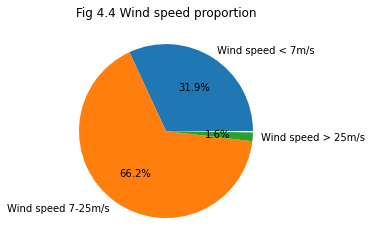

In [26]:
# pie chart here
plt.pie(tmp['%'], labels=tmp.index, autopct='%1.1f%%')
plt.title('Fig 4.4 Wind speed proportion')
plt.savefig('./img/Fig 4.4 Wind speed proportion.jpg')
plt.show()

#### 7.2.2.1 Check the trends again after omitting the unwanted data
Looks good as the overall trend remains.

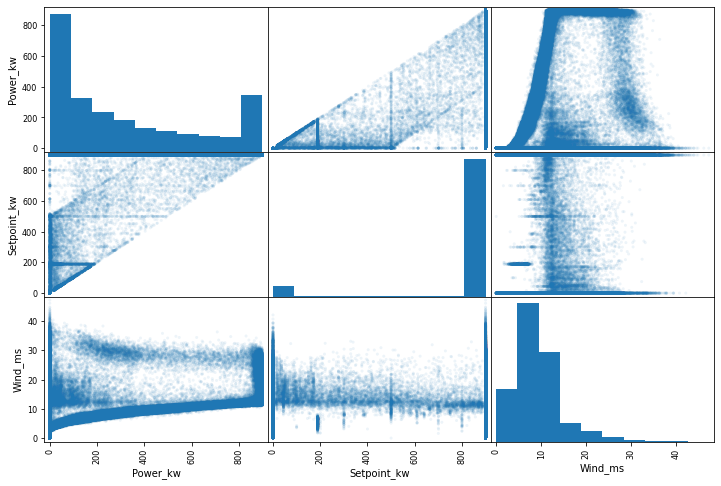

In [27]:
# drop all NA 
# drop all power kW > setpoint kW

df_supply = df_supply.dropna()[df_supply.Power_kw <= df_supply.Setpoint_kw]
d=scatter_matrix(df_supply, figsize=(12,8),alpha=0.08)

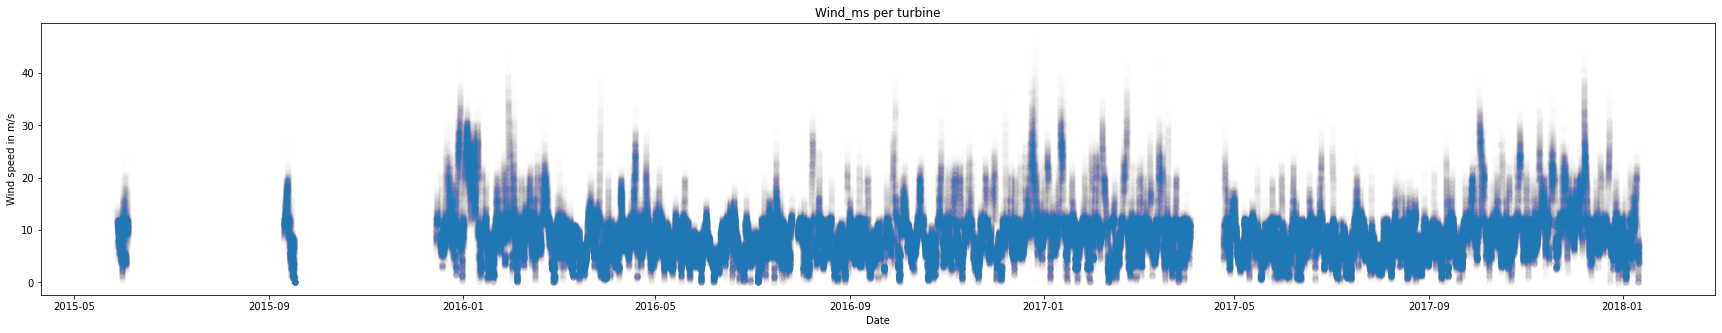

In [28]:
plt.figure(figsize=(30,5))
plt.scatter(df_supply['Timestamp'], df_supply['Wind_ms'], alpha = 0.003)
plt.xlabel('Date')
plt.ylabel('Wind speed in m/s')
plt.title('Wind_ms per turbine')

plt.show()

## 7.3 Choosing blade length for potential power calculation

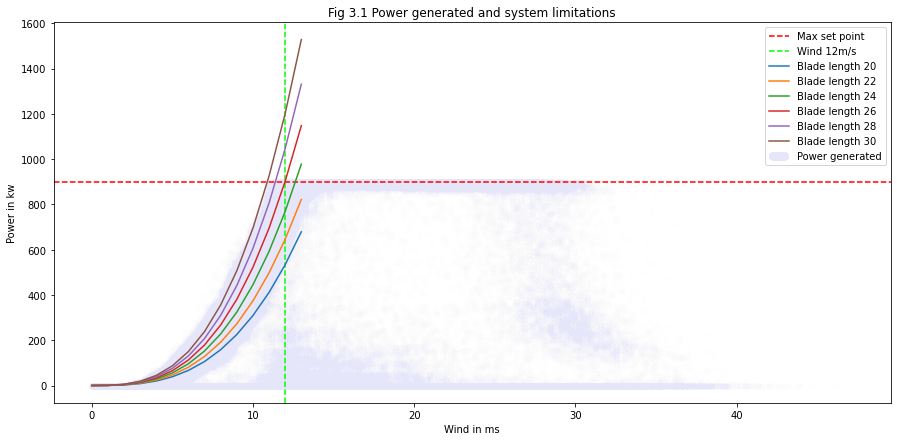

In [29]:
plt.figure(figsize=(15,7))

plt.scatter(df_supply['Wind_ms'],df_supply['Power_kw'], alpha=0.005, label='Power generated', color='lavender')
plt.axhline(y=900, color='r', linestyle='--', label='Max set point')
plt.axvline(12, color='lime', linestyle='--', label='Wind 12m/s')

# potential power curve
w = np.array(range(0,14)) # wind speed
length = range(20,31,2) # blade length in m
for l in length:
    potential_power=0.5*1.23*(np.pi*l**2)*(w**3)*0.4/1000
    plt.plot(potential_power, label='Blade length '+str(l))
    
plt.xlabel('Wind in ms')
plt.ylabel('Power in kw')
plt.title('Fig 3.1 Power generated and system limitations')
plt.legend(scatterpoints=1000)

plt.savefig('./img/Fig 3.1 Power generated and system limitations.jpg')
plt.show()

### 7.3.1 Curtailed power (kW)

#### What is curtailed power?
In layman's word with drawing analogy from water usage, power is water flow rate or $how\ strong$ water current is while energy is $how\ much$ water used, stored, and collected. So prior to calculating curtailed energy, we need to calculate curtailed power at first.

Curtailed power in wind turbine business is unused hidden capacity which cannot be used unfortunately. It could happen anytime because of random feature of mother nature and power balance between local grid demand and potential power. If wind velocity is high enough, potential power becomes 900kW, but if power demand is very low for some reason, a grid control center will send a command of lowering setpoint of the turbines to match the generation and consumption at point in time. Therefore, gap (or residual capacity) between potential power and setpoint is considered as curtailed power.  

#### Curtailed power equation
Curtailed power (kW) = Potential power (kW) - Setpoint (kW)

,where Potential power (kW) in terms of single turbine = 0.5 x 1.23 x (pi x 26^2) x wind speed^3 x 0.4 / 1000

In this case study, because setpoint of the turbine indicates whether the turbine is being forcibly curtailed by the setpoint commanded by the network operator, we used the above formula. 

Another alternative we conceived in the early stage of the study was: Curtailed power(kW) = Potential power kW - Total power generated (Power_kw). But considering that transient data were included in the turbine telemetry dataset, which could result in either overestimation or underestimation of the curtailment, we adopted the above formula.

### 7.3.2 Curtailed energy (kWh)

#### What is curtailed energy?
It stands for how $much$ energy was actually curtailed. We are interested in curtailed energy, not curtailed power because electricity provider charge us in terms of energy, not power.

- Energy: aggregate to area in time chart

#### Curtailed energy equation
Curtailed energy in one minute (kWh) = curtailed power(kW) x 0.278 x 10^-3 (=1hour/3600sec) x 60sec

Since energy is accumulation of every instant value of power, mathematically integral of power or calculating area under power curve, curtailed energy needs to be aggreagated from curtailed power. As the original turbine telemetry dataset stores operating data at 1-minute interval, curtailed energy is at first accumulated for one minute which means that a certain curtailed power at a certain time is interpreted as it lasted for one minute. The simplest understanding of the conversion is that curtailed power(kW) x 1hour is expected amount of curtailed energy(kWh) in 1 hour if the instant value does continulusly last for 1 hour, but here we want to calculate more granular curtailed energy of 60seconds, therefore, it is divided by 3600sec and multiplied back by 60seconds to make it 1-minute accumulated curtailed energy. Then the 1-minute curtailed energy can be used for further sum to 1month, 1year curtailed energy for the purposes of the analysis.     

### 7.3.3 Curtailment computation
Data used:
- df_supply: Drop all NA and Drop Power_kw > Setpoint_kw
- df_demand: Drop 2018
- Energy supply and demand should be quite constant in particular months across year, summer months should have less wind than winter months. Therefore, it is alright to have different years of supply and demand data, we can take the averages by months regardless year for curtailment calculation when needed.

Columns:
- Timestamp: the datatime in UTC of the measurement (the timestamp is situated at the end of the measurement period)
- Power_kw: average power in kW during the measurement period
- Setpoint_kw: the mean maximum-allowed generator output during the measurement period
- Wind_ms: mean wind speed at the turbine during the measurement period.
- Potential_power_kw: potential energy of single turbine = 0.5 x 1.23 x (pi x 26^2) x wind speed ^3 x 0.4 / 1000
- Curtailed_power_kw: potential power - Setpoint_kw 
- Curtailed_energy_in_1_minute_kwh:	Aggregated power for 1 minute with " curtailed power(kW) x 0.278 x 10^-3 x 60sec ". 

In [30]:
df_curtail = df_supply[:]
df_curtail['Potential_power_kw'] = 0.5*1.23*np.pi*26**2*(df_curtail['Wind_ms']**3)*0.4/1000

df_curtail['Curtailed_power_kw'] = df_curtail['Potential_power_kw'] - df_curtail['Setpoint_kw']

# set negative curtailment to 0
df_curtail['Curtailed_power_kw'][df_curtail['Curtailed_power_kw'] < 0] = 0 

# Assumed no curtailment when setpoint = 900
df_curtail['Curtailed_power_kw'][df_curtail['Setpoint_kw'] == 900] = 0 

# Assumed no curtailment when wind velocity is beyond 30m/s
df_curtail['Curtailed_power_kw'][df_curtail['Wind_ms'] > 30] = 0 

df_curtail['Curtailed_energy_in_1_minute_kwh'] = df_curtail['Curtailed_power_kw']*60 * 0.278 * 10**(-3)
df_curtail.head(3)

Timestamp  Power_kw  Setpoint_kw  Wind_ms  Potential_power_kw  \
0 2015-05-28 00:00:23    80.000      900.000    4.900              61.464   
1 2015-05-28 00:01:23    78.000      900.000    5.400              82.265   
2 2015-05-28 00:02:23    52.000      900.000    4.900              61.464   

   Curtailed_power_kw  Curtailed_energy_in_1_minute_kwh  
0               0.000                             0.000  
1               0.000                             0.000  
2               0.000                             0.000

## 7.4 Curtailment visualisations
### 7.4.1 Curtailed power plots

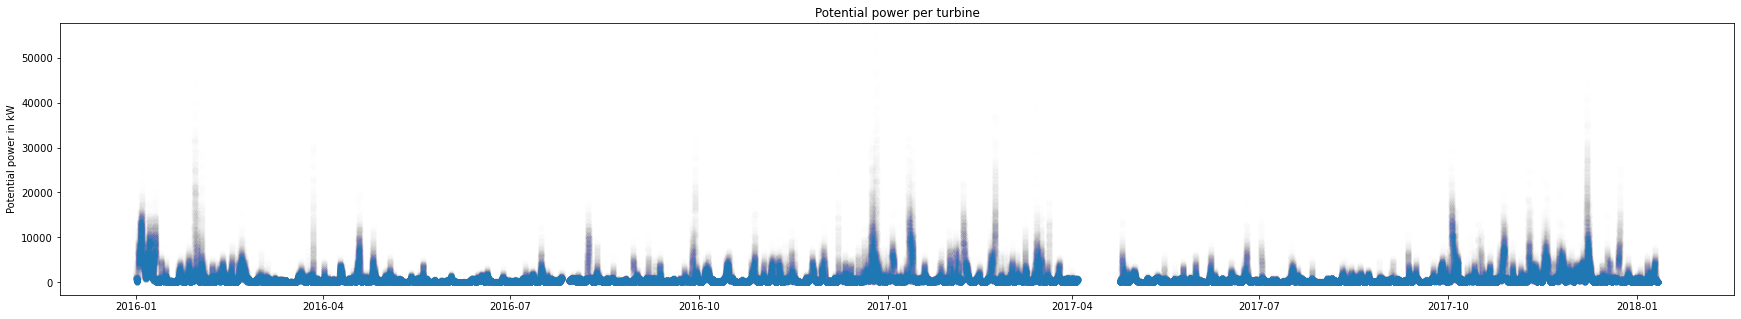

In [31]:
# Potential power
tmp = df_curtail[df_curtail['Timestamp'].dt.year != 2015]
plt.figure(figsize=(30,5))
plt.scatter(tmp['Timestamp'], tmp['Potential_power_kw'], alpha = 0.005)
plt.ylabel('Potential power in kW')
plt.title('Potential power per turbine')

plt.savefig('./Img/Potential power per turbine.jpg')
plt.show()

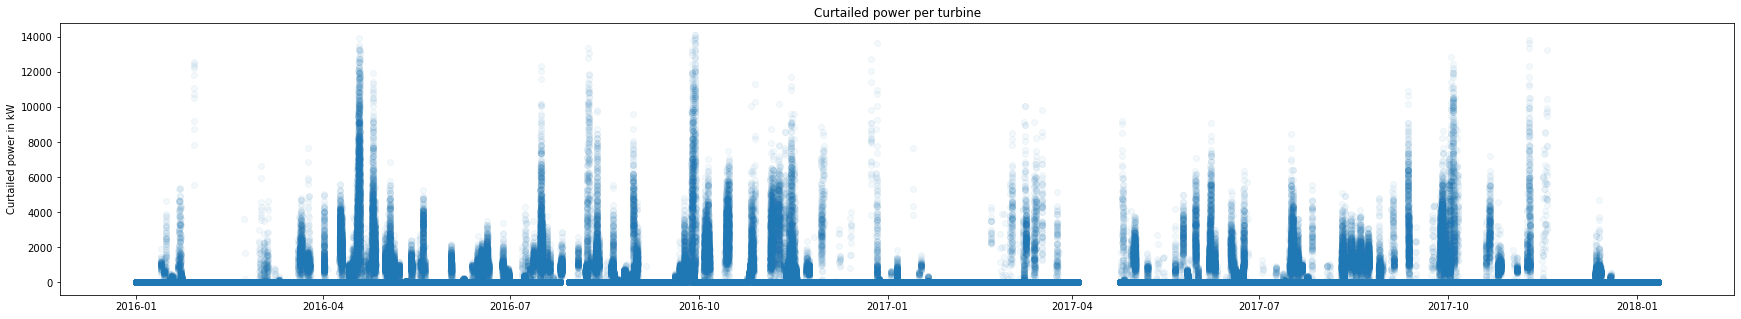

In [32]:
# Curtailed power excluding zeros
tmp = df_curtail[df_curtail['Timestamp'].dt.year != 2015]
plt.figure(figsize=(30,5))
plt.scatter(tmp['Timestamp'], tmp['Curtailed_power_kw'], alpha = 0.05)
plt.ylabel('Curtailed power in kW')
plt.title('Curtailed power per turbine')

plt.savefig('./Img/Curtailed power per turbine.jpg')
plt.show()

### 7.4.2 Curtailed energy plots

In [33]:
# get wind average per hour
tmp = df_supply[:]
tmp['Time_month'] = df_supply.Timestamp.dt.month
tmp['Time_hour'] = df_supply.Timestamp.dt.hour
wind_avg = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Wind_ms', aggfunc=np.mean)
wind_avg.head(3)

Wind_ms
Time_month Time_hour         
1          0           11.386
           1           11.347
           2           11.626

In [34]:
tmp = df_curtail[:]
tmp['Time_yyyymm'] = tmp.Timestamp.dt.strftime('%Y-%m')
tmp['Time_year'] = tmp.Timestamp.dt.year
tmp['Time_month'] = tmp.Timestamp.dt.month
tmp['Time_day'] = tmp.Timestamp.dt.day
tmp['Time_hour'] = tmp.Timestamp.dt.hour

# Hourly sum of curtailed energy
Sum_YearMonthHour_curtailed_energy_kWh = pd.pivot_table(tmp, index=['Time_year','Time_month','Time_hour'], values='Curtailed_energy_in_1_minute_kwh', aggfunc='sum').reset_index().rename(columns={'Curtailed_energy_in_1_minute_kwh': 'Curtailed_energy_kwh'})
# Daily sum of curtailed energy
Sum_YearMonthDay_curtailed_energy_kWh = pd.pivot_table(tmp, index=[tmp.Timestamp.dt.date,'Time_hour'], values='Curtailed_energy_in_1_minute_kwh', aggfunc='sum').rename(columns={'Curtailed_energy_in_1_minute_kwh': 'Curtailed_energy_kwh'})
# Monthly sum of curtailed energy
Sum_YearMonth_curtailed_energy_kWh = pd.pivot_table(tmp, index=['Time_year','Time_month'], values='Curtailed_energy_in_1_minute_kwh', aggfunc='sum').rename(columns={'Curtailed_energy_in_1_minute_kwh': 'Curtailed_energy_kwh'})

# Average curtailed energy per hour
Avg_MonthHour_curtailed_energy_kWh = pd.pivot_table(Sum_YearMonthHour_curtailed_energy_kWh, index=['Time_month','Time_hour'], values='Curtailed_energy_kwh', aggfunc='mean').join(wind_avg)
# Average curtailed energy per months
tmp = Sum_YearMonth_curtailed_energy_kWh.reset_index()
Avg_Month_curtailed_energy_kWh = pd.pivot_table(tmp, index=['Time_month'], values='Curtailed_energy_kwh', aggfunc='mean')


In [35]:
Sum_YearMonthHour_curtailed_energy_kWh.head(3)

Time_year  Time_month  Time_hour  Curtailed_energy_kwh
0       2015           5          0                 0.000
1       2015           5          1                 0.000
2       2015           5          2                 0.000

In [36]:
Sum_YearMonthDay_curtailed_energy_kWh.head(3)

Curtailed_energy_kwh
Timestamp  Time_hour                      
2015-05-28 0                         0.000
           1                         0.000
           2                         0.000

In [37]:
Sum_YearMonth_curtailed_energy_kWh.head(3)

Curtailed_energy_kwh
Time_year Time_month                      
2015      5                          0.000
          6                          1.630
          9                      48614.470

In [38]:
Avg_MonthHour_curtailed_energy_kWh.head(3)

Curtailed_energy_kwh  Wind_ms
Time_month Time_hour                               
1          0                         0.000   11.386
           1                       263.125   11.347
           2                       739.099   11.626

In [39]:
Avg_Month_curtailed_energy_kWh.head(3)

Curtailed_energy_kwh
Time_month                      
1                       6311.421
2                        827.255
3                      38532.437

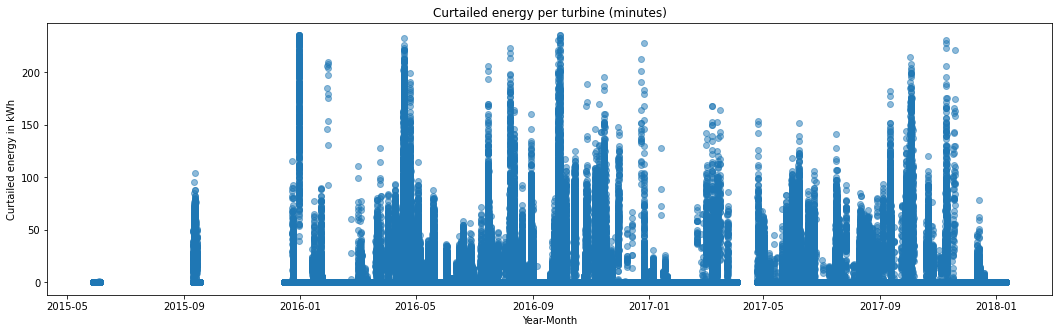

In [40]:
# Curtailed energy scatter plot excluding zeros
plt.figure(figsize=(18,5))
tmp = df_curtail[:]
plt.scatter(tmp['Timestamp'], tmp['Curtailed_energy_in_1_minute_kwh'], alpha = 0.5)
plt.ylabel('Curtailed energy in kWh')
plt.xlabel('Year-Month')
plt.title('Curtailed energy per turbine (minutes)')

plt.savefig('./Img/Curtailed energy per turbine(minutes).jpg')
plt.show()

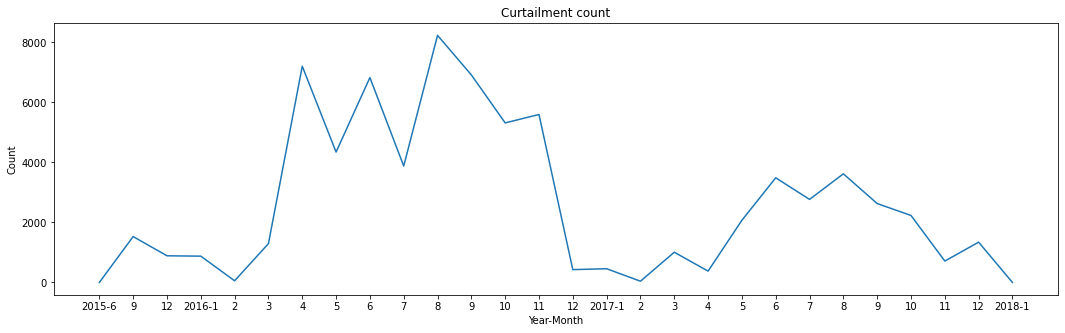

In [41]:
tmp = df_curtail[df_curtail.Curtailed_energy_in_1_minute_kwh != 0]

tmp = tmp.groupby([tmp.Timestamp.dt.year, tmp.Timestamp.dt.month]).count()[['Timestamp']]
tmp.plot(figsize=(18,5), legend=None)

xticks = ['2015-6', 9, 12, 
          '2016-1', 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 
          '2017-1', 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 
          '2018-1']

plt.title('Curtailment count')
plt.xticks(np.arange(len(tmp.index)), xticks)
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.savefig('./Img/Curtailed count.jpg')
plt.show()

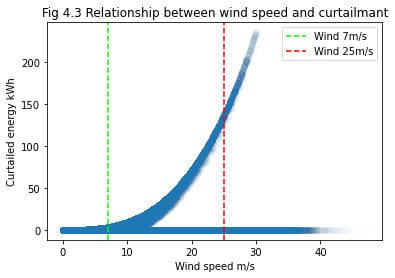

In [42]:
plt.scatter(df_curtail.Wind_ms, df_curtail.Curtailed_energy_in_1_minute_kwh, alpha=0.01)
plt.axvline(7, color='lime', linestyle='--', label='Wind 7m/s')
plt.axvline(25, color='red', linestyle='--', label='Wind 25m/s')
plt.title('Fig 4.3 Relationship between wind speed and curtailmant')
plt.xlabel('Wind speed m/s')
plt.ylabel('Curtailed energy kWh')
plt.legend()

plt.savefig('./img/Fig 4.3 Relationship between wind speed and curtailmant.jpg')
plt.show()

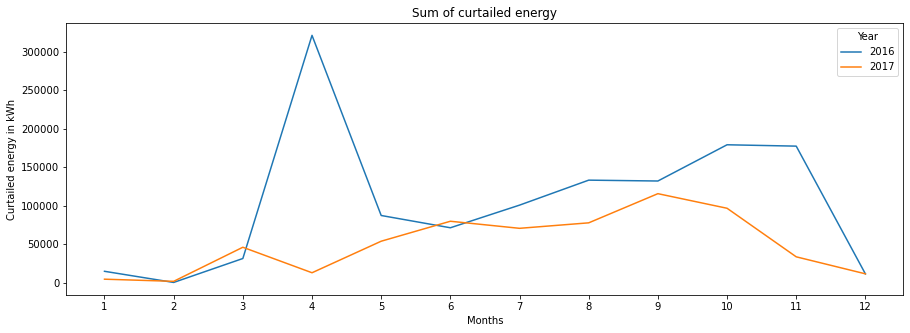

In [43]:
plt.figure(figsize=(15,5))
for i in [2016,2017]:
    plt.plot(Sum_YearMonth_curtailed_energy_kWh.loc[(i)], label=i)
plt.ylabel('Curtailed energy in kWh')
plt.xlabel('Months')
plt.xticks(range(1,13,1))
plt.title('Sum of curtailed energy')
plt.legend(title='Year')

plt.savefig('./Img/Sum of curtailed energy per turbine.jpg')
plt.show()

<AxesSubplot:xlabel='Timestamp,Timestamp'>

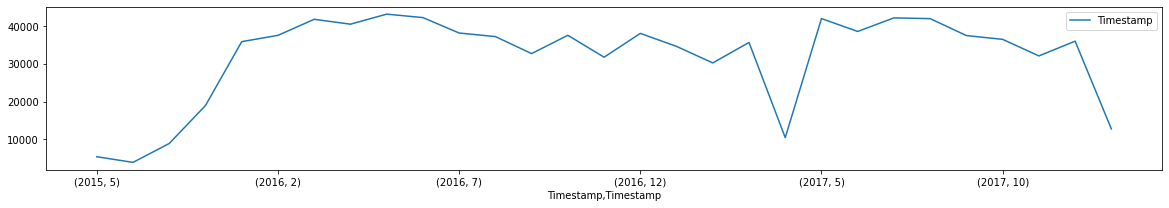

In [44]:
# counting missing data
df_curtail.groupby([df_curtail.Timestamp.dt.year,df_curtail.Timestamp.dt.month]).count().iloc[:,:1].plot(figsize=(20,3))

Sum of curtailed energy graph above illustrated that curtailed energy in 2017 is in general lower than 2016, this could possibly due to increasing households thus using more energy, or just annual effects or global warming related which were not recorded in the dataset.

Opposite trends in Apr, Sep could due to much less data in Sep 2016 and Apr 2017. The number of data in 2016 in general is less than 2017. 

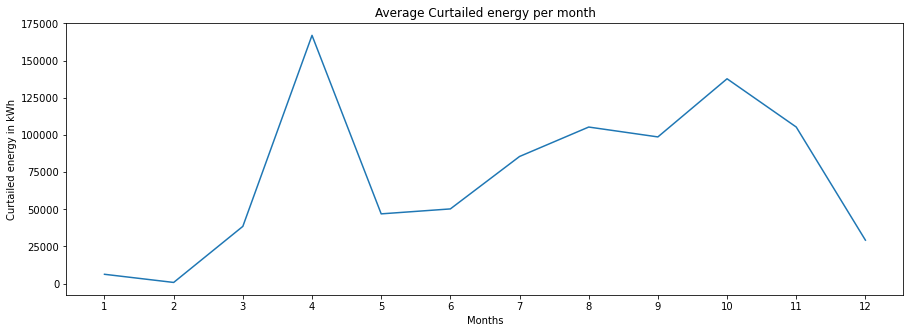

In [45]:
plt.figure(figsize=(15,5))
plt.plot(Avg_Month_curtailed_energy_kWh)
plt.ylabel('Curtailed energy in kWh')
plt.xlabel('Months')
plt.xticks(range(1,13,1))
plt.title('Average Curtailed energy per month')

plt.savefig('./Img/Average Curtailed energy per month per turbine.jpg')
plt.show()

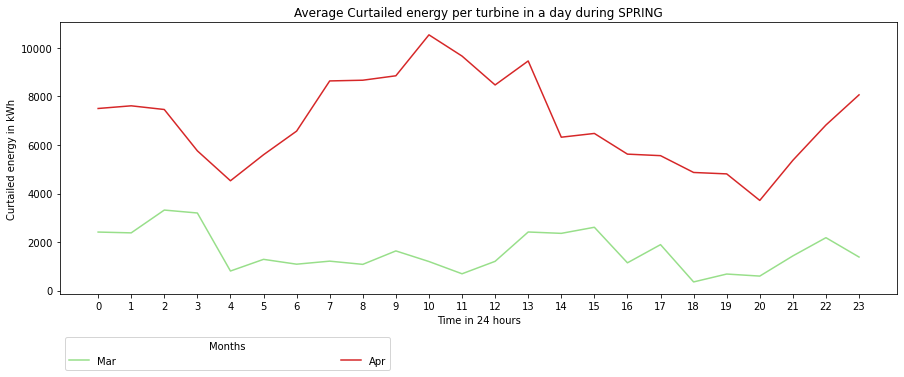

In [46]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(15,5))
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(3,5):   
    plt.plot(Avg_MonthHour_curtailed_energy_kWh.loc[(i),'Curtailed_energy_kwh'], label=month[i-1], color=colors[i])

plt.ylabel('Curtailed energy in kWh')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.title('Average Curtailed energy per turbine in a day during SPRING')
plt.legend(title='Months',bbox_to_anchor=(0., -0.24, 0.4, .102),ncol=6, mode="expand",loc='upper center')

plt.savefig('./Img/Average Curtailed energy per turbine in a day during SPRING per turbine.jpg')
plt.show()

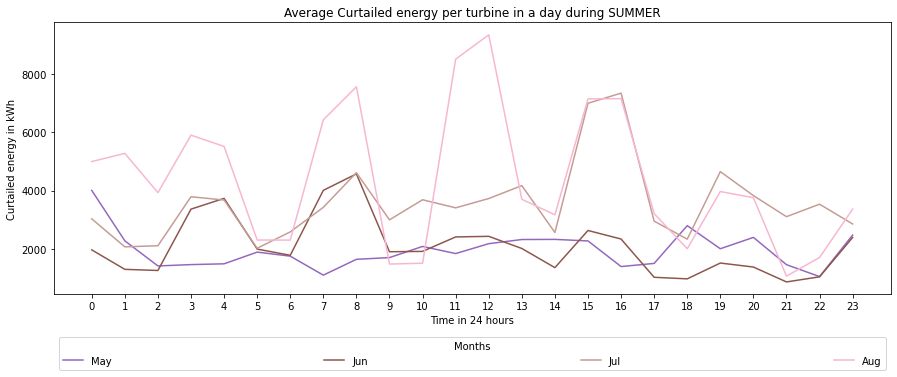

In [47]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(15,5))
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(5,9):
    plt.plot(Avg_MonthHour_curtailed_energy_kWh.loc[(i),'Curtailed_energy_kwh'], label=month[i-1], color=colors[i])
plt.ylabel('Curtailed energy in kWh')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.title('Average Curtailed energy per turbine in a day during SUMMER')
plt.legend(title='Months',bbox_to_anchor=(0., -0.24, 1, .102),ncol=6, mode="expand",loc='upper center')

plt.savefig('./Img/Average Curtailed energy per turbine in a day during SUMMER per turbine.jpg')
plt.show()

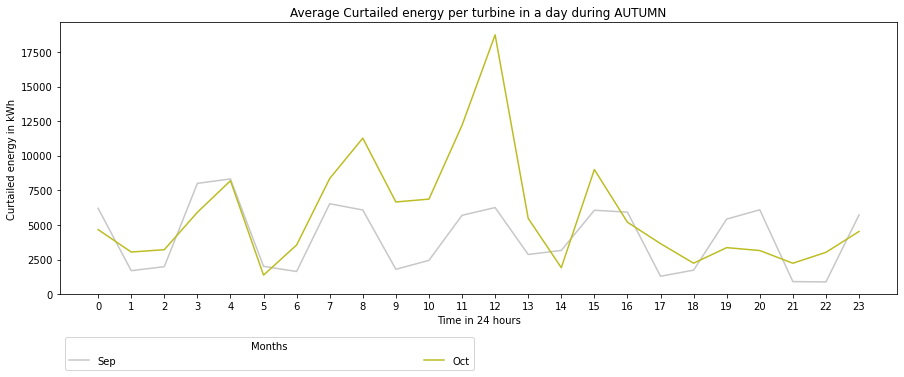

In [48]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(15,5))
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(9,11):
    plt.plot(Avg_MonthHour_curtailed_energy_kWh.loc[(i),'Curtailed_energy_kwh'], label=month[i-1], color=colors[i])
plt.ylabel('Curtailed energy in kWh')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.title('Average Curtailed energy per turbine in a day during AUTUMN')
plt.legend(title='Months',bbox_to_anchor=(0., -0.24, 0.5, .102),ncol=6, mode="expand",loc='upper center')

plt.savefig('./Img/Average Curtailed energy per turbine in a day during AUTUMN per turbine.jpg')
plt.show()

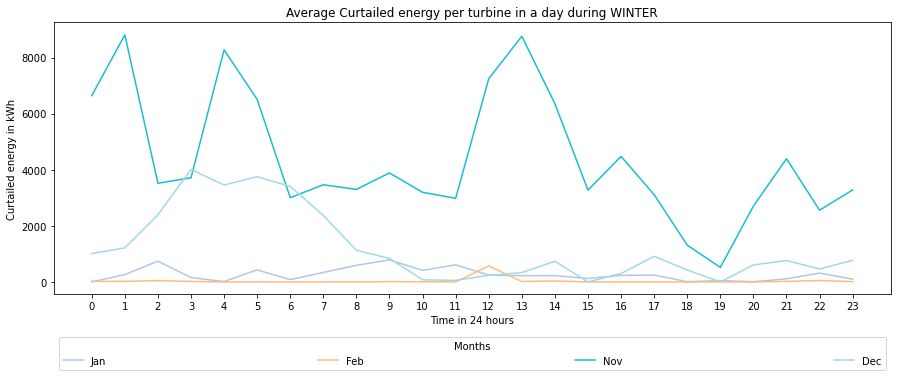

In [49]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(15,5))
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in [1,2,11,12]:
    plt.plot(Avg_MonthHour_curtailed_energy_kWh.loc[(i),'Curtailed_energy_kwh'], label=month[i-1], color=colors[i])
plt.ylabel('Curtailed energy in kWh')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.title('Average Curtailed energy per turbine in a day during WINTER')
plt.legend(title='Months',bbox_to_anchor=(0., -0.24, 1, .102),ncol=6, mode="expand",loc='upper center')

plt.savefig('./Img/Average Curtailed energy per turbine in a day during WINTER per turbine.jpg')
plt.show()

## 7.5 User behaviors

### 7.5.1  Average Wind speed pattern (Fig 4.5):
1. Winter (Nov - Feb): highest
2. Summer (May - Aug): lowest
3. Spring and Autumn: moderate
4. Not much differences in terms of hours

### 7.5.2 Average Demand pattern (Fig 4.6):
1. 0am-5am: low, sleeping
2. 5am-7am: start rising coz time to wakeup
3. 7am-3pm: constant coz people in office/ school, maybe just one person at home watching TV or doing houseworks.
4. 3pm-5pm: rise, peak at 6pm. People off work/ school, back to home and start using electricity like TV, computer, lights....
5. Winter time colder and dark earlier thus higher demand during 5pm-11pm
6. 6pm-11pm dropping: Night life outside, time to sleep

### 7.5.3 Average Curatiled energy (Fig 4.7):
1. Don't have obvious pattern because setpoint has no siginificant relationship with any variables as shown later in 7.5.6 

In [50]:
import matplotlib.transforms
bbox = matplotlib.transforms.Bbox([[0., -0.3], [1, .102]])

<Figure size 1080x1080 with 0 Axes>

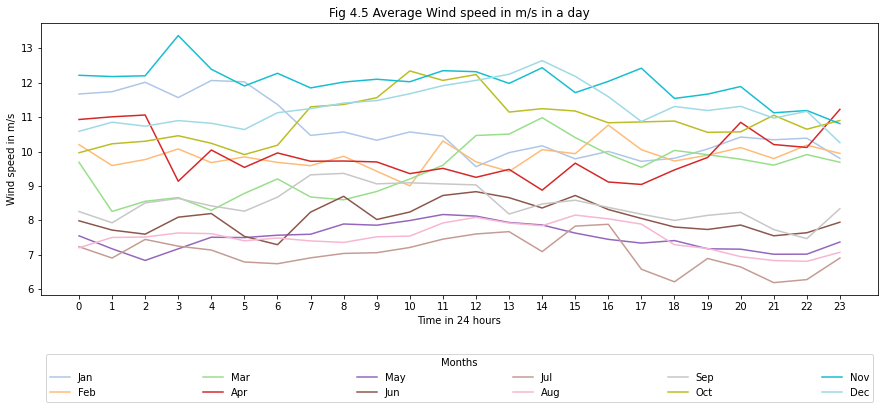

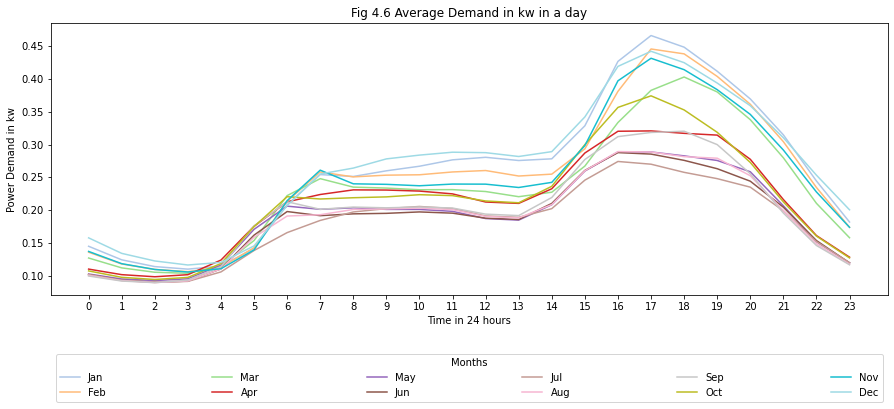

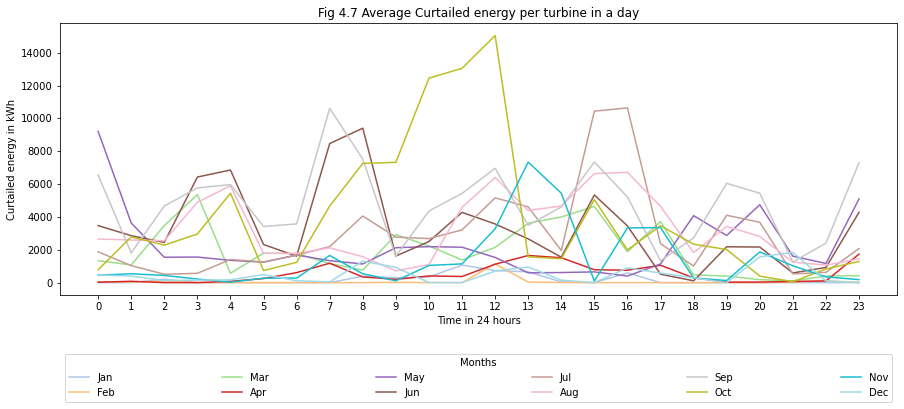

In [51]:
plt.figure(figsize=(15,15))

##### ---- Average Wind speed in m/s in a day (2017)
tmp = df_supply[df_supply.Timestamp.dt.year == 2017] # only 2017 for consistency with demand data
tmp['Time_month'] = df_supply.Timestamp.dt.month
tmp['Time_hour'] = df_supply.Timestamp.dt.hour
wind_avg = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Wind_ms', aggfunc=np.mean)

# plot
plt.figure(figsize=(15,5))
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for Month in range(1,13): 
    plt.plot(wind_avg.loc[(Month),'Wind_ms'], label=month[Month-1], color=colors[Month])
plt.xticks(range(0,24,1))
plt.ylabel('Wind speed in m/s')
plt.xlabel('Time in 24 hours')
plt.legend(title='Months',bbox_to_anchor=(0., -0.3, 1, .102),ncol=6, mode="expand",loc='upper center')
plt.title('Fig 4.5 Average Wind speed in m/s in a day')
plt.savefig('./Img/Fig 4.5 Average Wind speed in ms in a day.jpg',bbox_inches='tight')
plt.show()

##### ---- Average Demand in kw in a day (2017)
# Averge demands per households

tmp=df_demand[:]
tmp['Time_month'] = tmp['Timestamp'].dt.month
tmp['Time_hour'] = tmp['Timestamp'].dt.hour

monthly_avg_demand = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Demand_mean_kw', aggfunc=np.mean)

# plot
plt.figure(figsize=(15,5))
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for Month in range(1,13): 
    plt.plot(monthly_avg_demand.loc[(Month),'Demand_mean_kw'], label=month[Month-1], color=colors[Month])
plt.xticks(range(0,24,1))
plt.ylabel('Power Demand in kw')
plt.xlabel('Time in 24 hours')
plt.legend(title='Months',bbox_to_anchor=(0., -0.3, 1, .102),ncol=6, mode="expand",loc='upper center')
plt.title('Fig 4.6 Average Demand in kw in a day')
plt.savefig('./Img/Fig 4.6 Average Demand in kw in a day.jpg',bbox_inches='tight')
plt.show()


##### ---- Average Curtailed energy per turbine in a day (2017)
tmp = Sum_YearMonthHour_curtailed_energy_kWh[Sum_YearMonthHour_curtailed_energy_kWh.Time_year == 2017].iloc[:,1:]
plt.figure(figsize=(15,5))
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
for Month in range(1,13): 
    plt.plot(tmp[tmp.Time_month == Month]['Time_hour'],
             tmp[tmp.Time_month == Month]['Curtailed_energy_kwh'],
             label=months[Month-1], color=colors[Month])

plt.ylabel('Curtailed energy in kWh')  
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.legend(title='Months',bbox_to_anchor=(0., -0.3, 1, .102),ncol=6, mode="expand",loc='upper center')
plt.title('Fig 4.7 Average Curtailed energy per turbine in a day')  
plt.savefig('./Img/Fig 4.7 Average Curtailed energy per turbine in a day.jpg',bbox_inches='tight')
plt.show()


### 7.5.4 Interaction graph

In [52]:
from ipywidgets import interact, interact_manual

@interact(Month=[1,2,3,4,5,6,7,8,9,10,11,12])
##### ---- Average Curtailed energy per turbine in a day (2017)
def graph(Month):
    
    plt.figure(figsize=(15,12))
    
    
    ax1 = plt.subplot(311)
    ax2 = plt.subplot(312)
    ax3 = plt.subplot(313)
    
    ##### ---- Average Wind speed in m/s in a day (2017)
    tmp = df_supply[df_supply.Timestamp.dt.year == 2017] # Include only 2017 for consistency
    tmp['Time_month'] = df_supply.Timestamp.dt.month
    tmp['Time_hour'] = df_supply.Timestamp.dt.hour
    wind_avg = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Wind_ms', aggfunc=np.mean)

    # plot
    n=13
    colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
    month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    
    ax1.plot(wind_avg.loc[(Month),'Wind_ms'], label=month[Month-1], color=colors[Month])
    ax1.set_xticks(range(0,24,1))
    ax1.set_ylabel('Wind speed in m/s')
    ax1.set_title('Average Wind speed in m/s in a day')
    
    ##### ---- Average Demand in kw in a day (2017)
    # Averge demands per households

    tmp=df_demand[:]
    tmp['Time_month'] = tmp['Timestamp'].dt.month
    tmp['Time_hour'] = tmp['Timestamp'].dt.hour

    monthly_avg_demand = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Demand_mean_kw', aggfunc=np.mean)

    # plot
    n=13
    colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
    month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    ax2.plot(monthly_avg_demand.loc[(Month),'Demand_mean_kw'], label=month[Month-1], color=colors[Month])
    ax2.set_xticks(range(0,24,1))
    ax2.set_ylabel('Power Demand in kw')
    ax2.set_title('Average Demand in kw in a day')
    
    ##### ---- Average Curtailed energy per turbine in a day (2017)
    tmp = Sum_YearMonthHour_curtailed_energy_kWh[Sum_YearMonthHour_curtailed_energy_kWh.Time_year == 2017].iloc[:,1:]
    n=13
    colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
    months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
    ax3.plot(tmp[tmp.Time_month == Month]['Time_hour'],
             tmp[tmp.Time_month == Month]['Curtailed_energy_kwh'],
             label=months[Month-1], color=colors[Month])

    ax3.set_ylabel('Curtailed energy in kWh')
    ax3.set_xticks(range(0,24,1))
    ax3.set_title('Average Curtailed energy per turbine in a day') 
    ax3.set_xlabel('Time in 24 hours')
    
    plt.tight_layout(pad=2.0)
    plt.show()

interactive(children=(Dropdown(description='Month', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), value=1),…

### 7.5.5 Sum of demands
Demand_mean_kw provided is the mean demand of the sample of households during the measurement period where the timestamp is situated at the end of the measurement period. Assuming that every minutes within that period have the same demand in kW, we can calculate sum of demand in terms of energy (kWh) by:
1. Aggregated demand power in 1 minute = Demand_mean_kw x 60 sec x 0.278 x 10^-3
2. Thus, aggregated demand power in 30 minutes = (Demand_mean_kw x 60 sec x 0.278 x 10^-3) x 30

We also assumed total number of households was 22000 in 2017, referencing figure from the government (National Records of Scotland, n.d. [[8]](#Orkney-pop))

In [53]:
tmp=df_demand[:]
n=22000
tmp['Sum_demand_30min_kWh_1_household'] = (tmp['Demand_mean_kw']* 60 * 0.278 /1000) * 30
tmp['Total_demand_30min_kWh_N_households'] = tmp['Sum_demand_30min_kWh_1_household']* n

tmp['Time_month'] = tmp['Timestamp'].dt.month
tmp['Time_day'] = tmp['Timestamp'].dt.day
tmp['Time_hour'] = tmp['Timestamp'].dt.hour

DateHour_sum_demand_1house = pd.pivot_table(tmp, index=[tmp['Timestamp'].dt.date, 'Time_hour'], values='Sum_demand_30min_kWh_1_household', aggfunc='sum').rename(columns={'Sum_demand_30min_kWh_1_household': 'Demand_1house_kWh'})
MonthHour_sum_demand_1house = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Sum_demand_30min_kWh_1_household', aggfunc='sum').rename(columns={'Sum_demand_30min_kWh_1_household': 'Demand_1house_kWh'})

DateHour_sum_demand_Nhouses = pd.pivot_table(tmp, index=[tmp['Timestamp'].dt.date, 'Time_hour'], values='Total_demand_30min_kWh_N_households', aggfunc='sum').rename(columns={'Total_demand_30min_kWh_N_households': 'Demand_Nhouse_kWh'})
MonthHour_sum_demand_Nhouses = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Total_demand_30min_kWh_N_households', aggfunc='sum').rename(columns={'Total_demand_30min_kWh_N_households': 'Demand_Nhouse_kWh'})

DateHour_sum_demand = DateHour_sum_demand_1house.join(DateHour_sum_demand_Nhouses)
MonthHour_sum_demand = MonthHour_sum_demand_1house.join(MonthHour_sum_demand_Nhouses)

monthly_sum_demand = MonthHour_sum_demand_1house.reset_index().groupby('Time_month').sum().iloc[:,1:]
monthly_sum_demand['Demand_Nhouse_kWh'] = monthly_sum_demand['Demand_1house_kWh'] * n
monthly_sum_demand

Demand_1house_kWh  Demand_Nhouse_kWh
Time_month                                      
1                     201.576        4434681.672
2                     168.741        3712291.034
3                     172.284        3790244.931
4                     152.217        3348783.553
5                     142.931        3144473.886
6                     135.418        2979192.612
7                     135.696        2985312.219
8                     141.149        3105271.491
9                     142.663        3138580.243
10                    160.013        3520278.881
11                    175.291        3856412.162
12                    197.941        4354710.152

In [54]:
a=tmp.groupby([tmp.Timestamp.dt.year]).sum().rename(columns={'Sum_demand_30min_kWh_1_household': 'Annual kWh'}).loc[2017][['Annual kWh']]
m=tmp.groupby([tmp.Timestamp.dt.month]).sum().rename(columns={'Sum_demand_30min_kWh_1_household': 'Monthly kWh'}).mean()[['Monthly kWh']]
d=tmp.groupby([tmp.Timestamp.dt.date]).sum().rename(columns={'Sum_demand_30min_kWh_1_household': 'Daily kWh'}).mean()[['Daily kWh']]
avg_energy_consumption = pd.DataFrame()
avg_energy_consumption.loc['Electricity','Annual kWh'] = a.values
avg_energy_consumption.loc['Electricity','Monthly kWh'] = m.values
avg_energy_consumption.loc['Electricity','Daily kWh'] = d.values
avg_energy_consumption

Annual kWh  Monthly kWh  Daily kWh
Electricity    1919.577      160.493      5.262

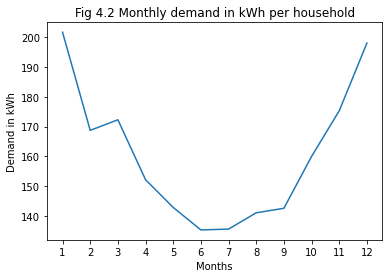

In [55]:
monthly_sum_demand['Demand_1house_kWh'].plot()
plt.xticks(np.arange(1,13))
plt.title('Fig 4.2 Monthly demand in kWh per household')
plt.xlabel('Months')
plt.ylabel('Demand in kWh')

plt.savefig('./img/Fig 4.2 Monthly demands per household scatter.jpg')
plt.show()

<AxesSubplot:xlabel='Time_month,Time_hour'>

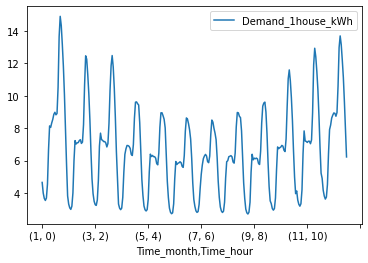

In [56]:
MonthHour_sum_demand_1house.plot()

In [57]:
tmp

Timestamp  Demand_mean_kw  N_households  \
1     2017-01-01 00:29:59           0.206          5429   
2     2017-01-01 00:59:59           0.189          5429   
3     2017-01-01 01:29:59           0.173          5429   
4     2017-01-01 01:59:59           0.159          5429   
5     2017-01-01 02:29:59           0.148          5429   
...                   ...             ...           ...   
17563 2018-01-01 21:29:59           0.306         10730   
17564 2018-01-01 21:59:59           0.283         10731   
17565 2018-01-01 22:29:59           0.256         10731   
17566 2018-01-01 22:59:59           0.246         10731   
17567 2018-01-01 23:29:59           0.219         10731   

       Sum_demand_30min_kWh_1_household  Total_demand_30min_kWh_N_households  \
1                                 0.103                             2267.209   
2                                 0.095                             2081.653   
3                                 0.087                             1905.822   
4                                 0.080                             1750.957   
5                                 0.074                             1625.517   
...                                 ...                                  ...   
17563                             0.153                             3367.647   
17564                             0.142                             3115.220   
17565                             0.128                             2823.737   
17566                             0.123                             2706.280   
17567                             0.109                             2408.649   

       Time_month  Time_day  Time_hour  
1               1         1          0  
2               1         1          0  
3               1         1          1  
4               1         1          1  
5               1         1          2  
...           ...       ...        ...  
17563           1         1         21  
17564           1         1         21  
17565           1         1         22  
17566           1         1         22  
17567           1         1         23  

[17567 rows x 8 columns]

### 7.5.6 Relationship between setpoint and other variables
We would like to see any relationship between setpoint and other variables, under what circumstances they change setpoint lower or higher. However, from results below, we don't see a clear relationships.

In [58]:
avg_curtail = df_curtail[:]
avg_curtail['month'] = avg_curtail['Timestamp'].dt.month
avg_curtail['hour'] = avg_curtail['Timestamp'].dt.hour

tmp1 = avg_curtail[avg_curtail['Timestamp'].dt.year==2017].groupby([avg_curtail.Timestamp.dt.date, 'hour']).mean().reset_index()
tmp2 = avg_curtail[avg_curtail['Timestamp'].dt.year==2017].groupby([avg_curtail.Timestamp.dt.date, 'hour']).sum().reset_index()
tmp1['Curtailed_energy_1hr_kwh'] = tmp2['Curtailed_energy_in_1_minute_kwh']
tmp1=tmp1.merge(DateHour_sum_demand_1house.reset_index(), how='left', left_on=["Timestamp","hour"], right_on=["Timestamp", "Time_hour"]).dropna()
tmp1['Wind_sq'] = tmp1['Wind_ms'] **2

tmp1['Low_usage'] = 0
tmp1['Medium_usage'] = 0
tmp1['High_usage'] = 0
tmp1['Spring'] = 0
tmp1['Summer'] = 0
tmp1['Autumn'] = 0
tmp1['Winter'] = 0


tmp1['Low_usage'][tmp1['hour'].isin([23,0,1,2,3,4,5])] = 1 #Low usage
tmp1['Medium_usage'][tmp1['hour'].isin(list(range(6,17)))] = 1 #Medium usage
tmp1['High_usage'][tmp1['hour'].isin(list(range(17,23)))] = 1
tmp1['Spring'][tmp1['month'].isin([3,4])] = 1
tmp1['Summer'][tmp1['month'].isin([5,6,7,8])] = 1
tmp1['Autumn'][tmp1['month'].isin([9,10])] = 1
tmp1['Winter'][tmp1['month'].isin([11,12,1,2])] = 1

x = tmp1[['Demand_1house_kWh','Potential_power_kw']]
y = tmp1['Setpoint_kw']


No significant correlation between Setpoint and Demand. Wind or potential power.

Text(0.5, 1.0, 'Fig 4.8 Correlation Heatmap')

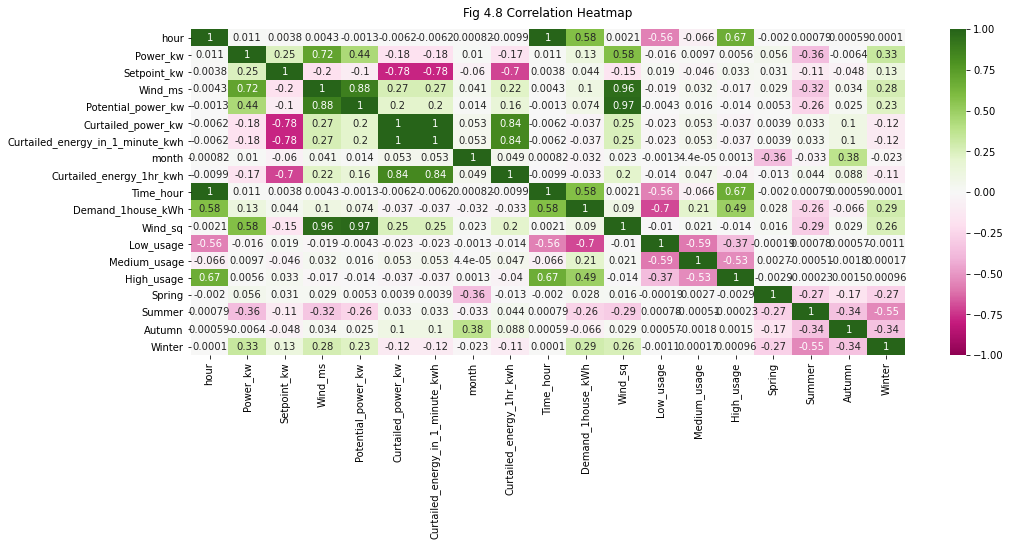

In [59]:
plt.figure(figsize=(16,6))

heatmap = sns.heatmap(tmp1.corr(), vmin=-1, vmax=1, annot=True, cmap="PiYG")

heatmap.set_title('Fig 4.8 Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

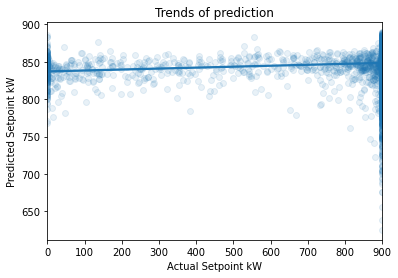

In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
predictions = model.predict(x)
sns.regplot(y,predictions,scatter_kws={'alpha':0.1})
plt.title('Trends of prediction')
plt.ylabel('Predicted Setpoint kW')
plt.xlabel('Actual Setpoint kW')
plt.show()

In [61]:
import statsmodels.api as sm

X = sm.add_constant(x)
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            Setpoint_kw   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     52.77
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           1.70e-23
Time:                        00:10:03   Log-Likelihood:                -54583.
No. Observations:                8202   AIC:                         1.092e+05
Df Residuals:                    8199   BIC:                         1.092e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                835.4333      5

R-sqaured is very low thus we can't predict setpoint using the OLS.

## 7.6 Problems of curtailment

### 7.6.1 How much energy is currently curtailed annually across the Orkney Isles? And the revenue loss? 

Electricity cost in Orkney (Switch Plan, 2021 [[9]](#Orkney-power-costs)):

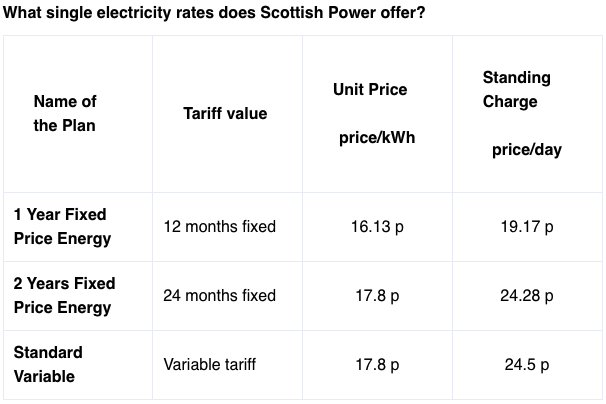

Assume the Orkney wind turbine provider charges customers the lowest rate of Scottish Power: 16.13p /kWh and 19.17p /day, revenue loss per minute due to curtailment equals to (Curtailed energy in kWh/minute * 16.13 + 19.17/1440) * 0.01

In [62]:
# number of minute in a day = 24*60 = 1440
# 19.17p/day standing charge converted to minute = (19.17 / 1440)p/minute
24*60

1440

In [63]:
# yearly revenue loss in GBP
df_curtail['Revenue_loss_GBP'] = (df_curtail.Curtailed_energy_in_1_minute_kwh* 16.13 + 19.17/1440)*0.01
tmp = df_curtail[df_curtail.Timestamp.dt.year.isin([2016,2017])].groupby(df_curtail['Timestamp'].dt.year).sum()[['Curtailed_energy_in_1_minute_kwh','Revenue_loss_GBP']].rename(columns={'Curtailed_energy_in_1_minute_kwh':'Annual Curtailment in kWh per turbine', 'Revenue_loss_GBP': 'Revenue loss in GBP per turbine'})
tmp['Annual Curtailment in kWh for 500 turbines'] = tmp['Annual Curtailment in kWh per turbine'] * 500
tmp['Revenue loss in GBP for 500 turbines'] = tmp['Revenue loss in GBP per turbine'] * 500
tmp

Annual Curtailment in kWh per turbine  \
Timestamp                                          
2016                                 1258535.584   
2017                                  602513.172   

           Revenue loss in GBP per turbine  \
Timestamp                                    
2016                            203062.661   
2017                             97241.054   

           Annual Curtailment in kWh for 500 turbines  \
Timestamp                                               
2016                                    629267792.112   
2017                                    301256586.123   

           Revenue loss in GBP for 500 turbines  
Timestamp                                        
2016                              101531330.304  
2017                               48620526.841

In [64]:
(tmp/1000000).rename(columns={'Annual Curtailment in kWh per turbine':'Annual Curtailment in GWh per turbine' ,
                           'Revenue loss in GBP per turbine':'Revenue loss in GBP (million) per turbine',
                           'Annual Curtailment in kWh for 500 turbines':'Annual Curtailment in GWh for 500 turbines',
                           'Revenue loss in GBP for 500 turbines':'Revenue loss in GBP (million) for 500 turbines'})

Annual Curtailment in GWh per turbine  \
Timestamp                                          
2016                                       1.259   
2017                                       0.603   

           Revenue loss in GBP (million) per turbine  \
Timestamp                                              
2016                                           0.203   
2017                                           0.097   

           Annual Curtailment in GWh for 500 turbines  \
Timestamp                                               
2016                                          629.268   
2017                                          301.257   

           Revenue loss in GBP (million) for 500 turbines  
Timestamp                                                  
2016                                              101.531  
2017                                               48.621

2017 values were half of 2016's. This huge differences could due to 
1. Uncertainties in wind speed as we couldn't expect what happens in the nature
2. Somehow more usages in 2017 so actually generated more power
We couldn't foresee whether in the next few years it is continue to drop due to reason 2, or have ups and downs due to reason 1, so we choose to take the average value as denominator in 7.6.2 - calculation of percentage of curtailed energy.

In [65]:
avg_16_17 = tmp.describe().loc[['mean']]
avg_16_17.index = ['Mean_2016&2017']
avg_16_17

Annual Curtailment in kWh per turbine  \
Mean_2016&2017                             930524.378   

                Revenue loss in GBP per turbine  \
Mean_2016&2017                       150151.857   

                Annual Curtailment in kWh for 500 turbines  \
Mean_2016&2017                               465262189.117   

                Revenue loss in GBP for 500 turbines  
Mean_2016&2017                          75075928.572

### 7.6.2 How much can this be reduced by different levels of DR penetration? How many local households would need to be on our DR scheme in order to supply this level of DR?
We have 22000 total households on the island as of 2017, so the maximum households we can penetrate DR to is 22000. In the trial period, we may want to start with fewer households i.e. 30 first to see if the DR devices cost could be covered in a few years.

Below table shows the average energy consumption and cost at Scotland (Jon Davies, 2019 [[1]](#average-electricity-gas-bills-in-2019)) :
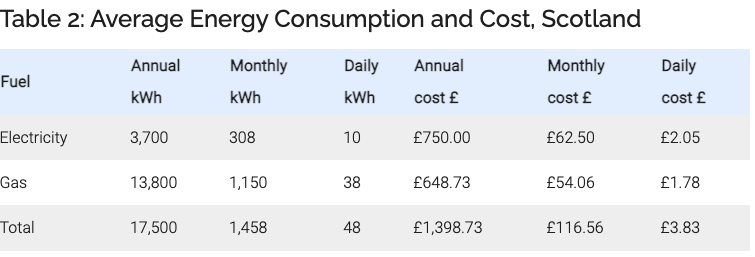

The average electricity monthly demand in Scotland is 308kWh, while Orkney was half of that (148kWh). The total energy consumption per household should not vary that much, therefore Orkney residents might be using far more gas than Scotland average. After installing DR devices, we could expect increase in demand to meet the average, and possibly also shift some gas usage to electricity, with the total overall energy usage unchanged.

In [66]:
print('Daily average electricity demand of one household (Orkney Island) is ',( monthly_sum_demand.sum()/365 )['Demand_1house_kWh'],'kWh')
print('Daily average electricity demand of one household (Scotland) is ',3700/365,'kWh')

Daily average electricity demand of one household (Orkney Island) is  5.276492258372609 kWh
Daily average electricity demand of one household (Scotland) is  10.136986301369863 kWh


The average electricity monthly demand in Scotland is 308kWh, while Orkney was half of that (148kWh). The total energy consumption per household should not vary that much, therefore Orkney residents might be using far more gas than Scotland average. After installing DR devices, we could expect increase in demand to meet the average, and possibly also shift some gas usage to electricity, with the total overall energy usage unchanged. 

Assume that all curtailed energy were first stored, and households appliances are connected to these devices to get curtailed energy, so the summer curtailed energy are stored to support households usage during winter.

We have several choices of power storage installation:
1. Battery storage for electricity energy:
    - CSE stated that 'On average installing a battery will cost £4,000-£8,000, with a useable capacity of 3.8-13.5 kWh' (CSE, n.d. [[3]](#avg-battery-storage-price)). Assume that to support daily usage of 5kWh (Orkney daily average) or 10kWh (Scotland daily average), we need a £5,000 or £6,500 battery storage respectively.
    
2. Storage heater to replace gas:
    - The storage capacity of a storage heater (Dimplex, n.d. [[4]](#storage-heater)) is 15.54kWh which can cover daily usage, costs £858.10. 
    - The energy needed exceeds daily average of demand per household 4.869kWh, so probably residents are using gas for heater, thus installing this could shift their energy usage from gas to wind. 

3. Hot water tank to replace gas:
    - A shower uses 8 litres per minute on average (CCW, n.d. [[5]](#shower-water-usage)). Assuming that all households have 3 residents, each of them take 10 minutes for a shower, they need 240 litres of hot water for shower per day. 240 litres of hot water needs 12.5kWh energy per day (Sust-it, n.d. [[6]](#water-heater-energy-calc)). 
    - A 210Ltrs 6kW immersion water heater (Shop4, n.d. [[7]](#water-heater)) costs £ 1,117.42. 
    - The energy needed for shower is 12.5kWh, which exceeds the daily average of demand per household 4.869kWh, so probably residents are using gas for hot water, thus installing this could shift their energy usage from gas to wind. 

##### How much gas could be shifted to wind energy through installing storage heater and hot water tank?
1. Assume storage heater annual usage 15.54kWh x 30 x 4 = 1864.8kWh (4 months winter usage)
2. Assume annual hot water usage 12.5kWh x 365 = 4562.5kWh
3. The ballpark allowable gas shift is (1864.8 + 4562.5)/13800 = 46.6%

We could also consider applying government subsidies on initial systems setup costs because our project helps carbon emission reduction which is one of the main focuses in upcoming decades. Therefore, for each of the below cases, we also have a subplan that include 10% government subsidy. 10% government subsidy is expected if successful because the UK number of CO2 in tons emission costs about 0.0148 GBP /kWh. Since variable portion of electricity price is 0.1613 GPB/kWh, it is roughly 10% impact in revenue.

Therefore, curtailment could be reduced further and calculated in following cases:
1. Installing battery storage 
    - Consumed energy kWh = Number of households x Orkney annual demands
2. Installing battery storage
    - Consumed energy kWh = Number of households x Scotland annual electricity demands
3. Installing battery storage + storage heater + hot water tank
    - Consumed energy kWh = Number of households x (Scotland annual electricity + 46% gas demands)
4. Installing storage heater + hot water tank
    - Consumed energy kWh = Number of households x Scotland annual 46% gas demands
    
After DR rollout and if proved demand could increase after 1 year trial, we could start charging customers. If the cost could be compensated within 6 years of trial (5 years after charging), we'll go for the plan. 6 years as the cut off point because we don't want to risk for the cost of appliances maintenance. Gas and electricity cost the same (Switch Plan, 2021 [[9]](#Orkney-power-costs)).

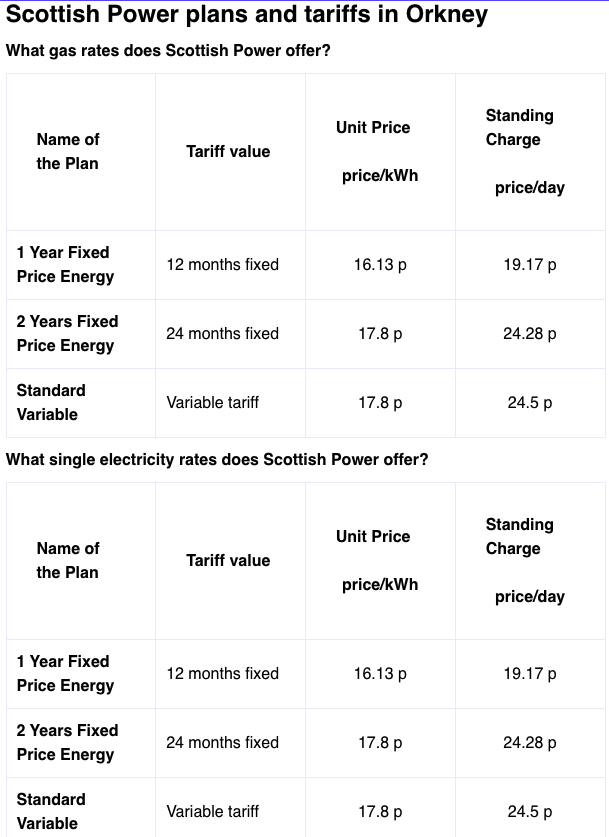

#### 7.6.2.1 Plan A: installing battery storage, based on Orkney eletricity demand
Consumed energy kWh = Households x Orkney annual demand

Result: Not recommended. Not profitable in 6 years.

In [67]:
DR=pd.DataFrame()

n = [22000, 22000*0.75, 22000*0.5, 22000*0.25, 100, 50, 30]
for i in range(len(n)):
    n_house = n[i]
    DR.loc[i,'N_households'] = n_house
    DR.loc[i,'Consumed_energy_kwh'] = n_house * monthly_sum_demand.sum()['Demand_1house_kWh']
    DR.loc[i,'%of_curtailed_energy_kwh'] = float(DR.loc[i,'Consumed_energy_kwh'] / avg_16_17['Annual Curtailment in kWh for 500 turbines'].values) * 100
    DR.loc[i,'Revenue in GBP'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01
    DR.loc[i,'Revenue in GBP (25% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.75
    DR.loc[i,'Revenue in GBP (50% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.5
    DR.loc[i,'Revenue in GBP (75% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.25
    
    DR.loc[i,'Cost of battery storage'] = 5000 
    DR.loc[i,'Battery storage capacity kWh'] = 5
    
    # First year is not profitable because under DR trial. 
    DR.loc[i,'Profit in GBP (2nd year)'] = DR.loc[i,'Revenue in GBP'] - 5000 * n_house
    DR.loc[i,'Profit in GBP (2nd year) (25% discount)'] = DR.loc[i,'Revenue in GBP (25% discount)'] - 5000 * n_house
    DR.loc[i,'Profit in GBP (2nd year) (50% discount)'] = DR.loc[i,'Revenue in GBP (50% discount)'] - 5000 * n_house
    DR.loc[i,'Profit in GBP (2nd year) (75% discount)'] = DR.loc[i,'Revenue in GBP (75% discount)'] - 5000 * n_house
    
    DR.loc[i,'Profit in GBP (6 years)'] = 5*DR.loc[i,'Revenue in GBP'] - 5000 * n_house
    DR.loc[i,'Profit in GBP (6 years) (25% discount)'] = 5*DR.loc[i,'Revenue in GBP (25% discount)'] - 5000 * n_house
    DR.loc[i,'Profit in GBP (6 years) (50% discount)'] = 5*DR.loc[i,'Revenue in GBP (50% discount)'] - 5000 * n_house
    DR.loc[i,'Profit in GBP (6 years) (75% discount)'] = 5*DR.loc[i,'Revenue in GBP (75% discount)'] - 5000 * n_house

DR

N_households  Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000         42370232.835                     9.107   
1     16500.000         31777674.626                     6.830   
2     11000.000         21185116.417                     4.553   
3      5500.000         10592558.209                     2.277   
4       100.000           192591.967                     0.041   
5        50.000            96295.984                     0.021   
6        30.000            57777.590                     0.012   

   Revenue in GBP  Revenue in GBP (25% discount)  \
0     6834388.527                    5125791.395   
1     5125808.888                    3844356.666   
2     3417229.249                    2562921.936   
3     1708649.610                    1281487.207   
4       31135.055                      23351.291   
5       15602.513                      11701.885   
6        9389.496                       7042.122   

   Revenue in GBP (50% discount)  Revenue in GBP (75% discount)  \
0                    3417194.263                    1708597.132   
1                    2562904.444                    1281452.222   
2                    1708614.624                     854307.312   
3                     854324.805                     427162.402   
4                      15567.527                       7783.764   
5                       7801.256                       3900.628   
6                       4694.748                       2347.374   

   Cost of battery storage  Battery storage capacity kWh  \
0                 5000.000                         5.000   
1                 5000.000                         5.000   
2                 5000.000                         5.000   
3                 5000.000                         5.000   
4                 5000.000                         5.000   
5                 5000.000                         5.000   
6                 5000.000                         5.000   

   Profit in GBP (2nd year)  Profit in GBP (2nd year) (25% discount)  \
0            -103165611.473                           -104874208.605   
1             -77374191.112                            -78655643.334   
2             -51582770.751                            -52437078.064   
3             -25791350.390                            -26218512.793   
4               -468864.945                              -476648.709   
5               -234397.487                              -238298.115   
6               -140610.504                              -142957.878   

   Profit in GBP (2nd year) (50% discount)  \
0                           -106582805.737   
1                            -79937095.556   
2                            -53291385.376   
3                            -26645675.195   
4                              -484432.473   
5                              -242198.744   
6                              -145305.252   

   Profit in GBP (2nd year) (75% discount)  Profit in GBP (6 years)  \
0                           -108291402.868            -75828057.366   
1                            -81218547.778            -56870955.562   
2                            -54145692.688            -37913853.757   
3                            -27072837.598            -18956751.952   
4                              -492216.236              -344324.726   
5                              -246099.372              -171987.437   
6                              -147652.626              -103052.521   

   Profit in GBP (6 years) (25% discount)  \
0                           -84371043.025   
1                           -63278216.671   
2                           -42185390.318   
3                           -21092563.964   
4                             -383243.544   
5                             -191490.577   
6                             -114789.391   

   Profit in GBP (6 years) (50% discount)  \
0                           -92914028.683   
1                           -69685477.781   
2                           

In [68]:
DR=DR.rename(columns={'Consumed_energy_kwh':'Annual_Consumed_energy_kwh'})
DR[['N_households','Annual_Consumed_energy_kwh','%of_curtailed_energy_kwh','Profit in GBP (6 years)','Profit in GBP (6 years) (25% discount)','Profit in GBP (6 years) (50% discount)','Profit in GBP (6 years) (75% discount)']]

N_households  Annual_Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000                42370232.835                     9.107   
1     16500.000                31777674.626                     6.830   
2     11000.000                21185116.417                     4.553   
3      5500.000                10592558.209                     2.277   
4       100.000                  192591.967                     0.041   
5        50.000                   96295.984                     0.021   
6        30.000                   57777.590                     0.012   

   Profit in GBP (6 years)  Profit in GBP (6 years) (25% discount)  \
0            -75828057.366                           -84371043.025   
1            -56870955.562                           -63278216.671   
2            -37913853.757                           -42185390.318   
3            -18956751.952                           -21092563.964   
4              -344324.726                             -383243.544   
5              -171987.437                             -191490.577   
6              -103052.521                             -114789.391   

   Profit in GBP (6 years) (50% discount)  \
0                           -92914028.683   
1                           -69685477.781   
2                           -46456926.878   
3                           -23228375.976   
4                             -422162.363   
5                             -210993.718   
6                             -126526.260   

   Profit in GBP (6 years) (75% discount)  
0                          -101457014.342  
1                           -76092738.890  
2                           -50728463.439  
3                           -25364187.988  
4                             -461081.181  
5                             -230496.859  
6                             -138263.130

#### 7.6.2.1a Plan A: installing battery storage, based on Orkney eletricity demand (with 10% government subsidy on costs)
Consumed energy (kWh) = Households x Orkney annual demand

Result: Not recommended. Not profitable in 6 years.

In [69]:
DR=pd.DataFrame()

n = [22000, 22000*0.75, 22000*0.5, 22000*0.25, 100, 50, 30]
for i in range(len(n)):
    n_house = n[i]
    DR.loc[i,'N_households'] = n_house
    DR.loc[i,'Consumed_energy_kwh'] = n_house * monthly_sum_demand.sum()['Demand_1house_kWh']
    DR.loc[i,'%of_curtailed_energy_kwh'] = float(DR.loc[i,'Consumed_energy_kwh'] / avg_16_17['Annual Curtailment in kWh for 500 turbines'].values) * 100
    DR.loc[i,'Revenue in GBP'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01
    DR.loc[i,'Revenue in GBP (25% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.75
    DR.loc[i,'Revenue in GBP (50% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.5
    DR.loc[i,'Revenue in GBP (75% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.25
    
    DR.loc[i,'Cost of battery storage'] = 5000 
    DR.loc[i,'Battery storage capacity kWh'] = 5
    
    # First year is not profitable because under DR trial. 
    DR.loc[i,'Profit in GBP (2nd year)'] = DR.loc[i,'Revenue in GBP'] - 5000 * n_house * 0.9
    DR.loc[i,'Profit in GBP (2nd year) (25% discount)'] = DR.loc[i,'Revenue in GBP (25% discount)'] - 5000 * n_house * 0.9
    DR.loc[i,'Profit in GBP (2nd year) (50% discount)'] = DR.loc[i,'Revenue in GBP (50% discount)'] - 5000 * n_house * 0.9
    DR.loc[i,'Profit in GBP (2nd year) (75% discount)'] = DR.loc[i,'Revenue in GBP (75% discount)'] - 5000 * n_house * 0.9
    
    DR.loc[i,'Profit in GBP (6 years)'] = 5*DR.loc[i,'Revenue in GBP'] - 5000 * n_house * 0.9
    DR.loc[i,'Profit in GBP (6 years) (25% discount)'] = 5*DR.loc[i,'Revenue in GBP (25% discount)'] - 5000 * n_house * 0.9
    DR.loc[i,'Profit in GBP (6 years) (50% discount)'] = 5*DR.loc[i,'Revenue in GBP (50% discount)'] - 5000 * n_house * 0.9
    DR.loc[i,'Profit in GBP (6 years) (75% discount)'] = 5*DR.loc[i,'Revenue in GBP (75% discount)'] - 5000 * n_house * 0.9

DR

N_households  Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000         42370232.835                     9.107   
1     16500.000         31777674.626                     6.830   
2     11000.000         21185116.417                     4.553   
3      5500.000         10592558.209                     2.277   
4       100.000           192591.967                     0.041   
5        50.000            96295.984                     0.021   
6        30.000            57777.590                     0.012   

   Revenue in GBP  Revenue in GBP (25% discount)  \
0     6834388.527                    5125791.395   
1     5125808.888                    3844356.666   
2     3417229.249                    2562921.936   
3     1708649.610                    1281487.207   
4       31135.055                      23351.291   
5       15602.513                      11701.885   
6        9389.496                       7042.122   

   Revenue in GBP (50% discount)  Revenue in GBP (75% discount)  \
0                    3417194.263                    1708597.132   
1                    2562904.444                    1281452.222   
2                    1708614.624                     854307.312   
3                     854324.805                     427162.402   
4                      15567.527                       7783.764   
5                       7801.256                       3900.628   
6                       4694.748                       2347.374   

   Cost of battery storage  Battery storage capacity kWh  \
0                 5000.000                         5.000   
1                 5000.000                         5.000   
2                 5000.000                         5.000   
3                 5000.000                         5.000   
4                 5000.000                         5.000   
5                 5000.000                         5.000   
6                 5000.000                         5.000   

   Profit in GBP (2nd year)  Profit in GBP (2nd year) (25% discount)  \
0             -92165611.473                            -93874208.605   
1             -69124191.112                            -70405643.334   
2             -46082770.751                            -46937078.064   
3             -23041350.390                            -23468512.793   
4               -418864.945                              -426648.709   
5               -209397.487                              -213298.115   
6               -125610.504                              -127957.878   

   Profit in GBP (2nd year) (50% discount)  \
0                            -95582805.737   
1                            -71687095.556   
2                            -47791385.376   
3                            -23895675.195   
4                              -434432.473   
5                              -217198.744   
6                              -130305.252   

   Profit in GBP (2nd year) (75% discount)  Profit in GBP (6 years)  \
0                            -97291402.868            -64828057.366   
1                            -72968547.778            -48620955.562   
2                            -48645692.688            -32413853.757   
3                            -24322837.598            -16206751.952   
4                              -442216.236              -294324.726   
5                              -221099.372              -146987.437   
6                              -132652.626               -88052.521   

   Profit in GBP (6 years) (25% discount)  \
0                           -73371043.025   
1                           -55028216.671   
2                           -36685390.318   
3                           -18342563.964   
4                             -333243.544   
5                             -166490.577   
6                              -99789.391   

   Profit in GBP (6 years) (50% discount)  \
0                           -81914028.683   
1                           -61435477.781   
2                           

In [70]:
DR=DR.rename(columns={'Consumed_energy_kwh':'Annual_Consumed_energy_kwh'})
DR[['N_households','Annual_Consumed_energy_kwh','%of_curtailed_energy_kwh','Profit in GBP (6 years)','Profit in GBP (6 years) (25% discount)','Profit in GBP (6 years) (50% discount)','Profit in GBP (6 years) (75% discount)']]

N_households  Annual_Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000                42370232.835                     9.107   
1     16500.000                31777674.626                     6.830   
2     11000.000                21185116.417                     4.553   
3      5500.000                10592558.209                     2.277   
4       100.000                  192591.967                     0.041   
5        50.000                   96295.984                     0.021   
6        30.000                   57777.590                     0.012   

   Profit in GBP (6 years)  Profit in GBP (6 years) (25% discount)  \
0            -64828057.366                           -73371043.025   
1            -48620955.562                           -55028216.671   
2            -32413853.757                           -36685390.318   
3            -16206751.952                           -18342563.964   
4              -294324.726                             -333243.544   
5              -146987.437                             -166490.577   
6               -88052.521                              -99789.391   

   Profit in GBP (6 years) (50% discount)  \
0                           -81914028.683   
1                           -61435477.781   
2                           -40956926.878   
3                           -20478375.976   
4                             -372162.363   
5                             -185993.718   
6                             -111526.260   

   Profit in GBP (6 years) (75% discount)  
0                           -90457014.342  
1                           -67842738.890  
2                           -45228463.439  
3                           -22614187.988  
4                             -411081.181  
5                             -205496.859  
6                             -123263.130

#### 7.6.2.2 Plan B: installing battery storage, based on Scotland electricity demand
Consumed energy kWh = Households x Scotland annual electricity demand

Result: Not recommended. Not profitable in 6 years.

In [71]:
DR=pd.DataFrame()

n = [22000, 22000*0.75, 22000*0.5, 22000*0.25, 100, 50, 30]
for i in range(len(n)):
    n_house = n[i]
    DR.loc[i,'N_households'] = n_house
    DR.loc[i,'Consumed_energy_kwh'] = n_house * 3700
    DR.loc[i,'%of_curtailed_energy_kwh'] = float(DR.loc[i,'Consumed_energy_kwh'] / avg_16_17['Annual Curtailment in kWh for 500 turbines'].values)*100
    DR.loc[i,'Revenue in GBP'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01
    DR.loc[i,'Revenue in GBP (25% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.75
    DR.loc[i,'Revenue in GBP (50% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.5
    DR.loc[i,'Revenue in GBP (75% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.25
    
    DR.loc[i,'Cost of battery storage'] = 6500
    DR.loc[i,'Battery storage capacity kWh'] = 10
    
    # First year is not profitable because under DR trial. 
    DR.loc[i,'Profit in GBP (2nd year)'] = DR.loc[i,'Revenue in GBP'] - 6500 * n_house
    DR.loc[i,'Profit in GBP (2nd year) (25% discount)'] = DR.loc[i,'Revenue in GBP (25% discount)'] - 6500 * n_house
    DR.loc[i,'Profit in GBP (2nd year) (50% discount)'] = DR.loc[i,'Revenue in GBP (50% discount)'] - 6500 * n_house
    DR.loc[i,'Profit in GBP (2nd year) (75% discount)'] = DR.loc[i,'Revenue in GBP (75% discount)'] - 6500 * n_house
    
    DR.loc[i,'Profit in GBP (6 years)'] = 5*DR.loc[i,'Revenue in GBP'] - 6500 * n_house
    DR.loc[i,'Profit in GBP (6 years) (25% discount)'] = 5*DR.loc[i,'Revenue in GBP (25% discount)'] - 6500 * n_house
    DR.loc[i,'Profit in GBP (6 years) (50% discount)'] = 5*DR.loc[i,'Revenue in GBP (50% discount)'] - 6500 * n_house
    DR.loc[i,'Profit in GBP (6 years) (75% discount)'] = 5*DR.loc[i,'Revenue in GBP (75% discount)'] - 6500 * n_house
DR

N_households  Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000         81400000.000                    17.496   
1     16500.000         61050000.000                    13.122   
2     11000.000         40700000.000                     8.748   
3      5500.000         20350000.000                     4.374   
4       100.000           370000.000                     0.080   
5        50.000           185000.000                     0.040   
6        30.000           111000.000                     0.024   

   Revenue in GBP  Revenue in GBP (25% discount)  \
0    13129889.970                    9847417.478   
1     9847434.970                    7385576.228   
2     6564979.970                    4923734.978   
3     3282524.971                    2461893.728   
4       59750.970                      44813.228   
5       29910.470                      22432.853   
6       17974.271                      13480.703   

   Revenue in GBP (50% discount)  Revenue in GBP (75% discount)  \
0                    6564944.985                    3282472.493   
1                    4923717.485                    2461858.743   
2                    3282489.985                    1641244.993   
3                    1641262.485                     820631.243   
4                      29875.485                      14937.743   
5                      14955.235                       7477.618   
6                       8987.135                       4493.568   

   Cost of battery storage  Battery storage capacity kWh  \
0                 6500.000                        10.000   
1                 6500.000                        10.000   
2                 6500.000                        10.000   
3                 6500.000                        10.000   
4                 6500.000                        10.000   
5                 6500.000                        10.000   
6                 6500.000                        10.000   

   Profit in GBP (2nd year)  Profit in GBP (2nd year) (25% discount)  \
0            -129870110.030                           -133152582.522   
1             -97402565.030                            -99864423.772   
2             -64935020.030                            -66576265.022   
3             -32467475.030                            -33288106.272   
4               -590249.029                              -605186.772   
5               -295089.530                              -302567.147   
6               -177025.729                              -181519.297   

   Profit in GBP (2nd year) (50% discount)  \
0                           -136435055.015   
1                           -102326282.515   
2                            -68217510.015   
3                            -34108737.515   
4                              -620124.515   
5                              -310044.765   
6                              -186012.865   

   Profit in GBP (2nd year) (75% discount)  Profit in GBP (6 years)  \
0                           -139717527.507            -77350550.148   
1                           -104788141.257            -58012825.148   
2                            -69858755.007            -38675100.148   
3                            -34929368.757            -19337375.148   
4                              -635062.257              -351245.148   
5                              -317522.382              -175447.647   
6                              -190506.432              -105128.647   

   Profit in GBP (6 years) (25% discount)  \
0                           -93762912.611   
1                           -70322118.861   
2                           -46881325.111   
3                           -23440531.361   
4                             -425933.861   
5                             -212835.736   
6                             -127596.486   

   Profit in GBP (6 years) (50% discount)  \
0                          -110175275.074   
1                           -82631412.574   
2                           

In [72]:
DR=DR.rename(columns={'Consumed_energy_kwh':'Annual_Consumed_energy_kwh'})
DR[['N_households','Annual_Consumed_energy_kwh','%of_curtailed_energy_kwh','Profit in GBP (6 years)','Profit in GBP (6 years) (25% discount)','Profit in GBP (6 years) (50% discount)','Profit in GBP (6 years) (75% discount)']]

N_households  Annual_Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000                81400000.000                    17.496   
1     16500.000                61050000.000                    13.122   
2     11000.000                40700000.000                     8.748   
3      5500.000                20350000.000                     4.374   
4       100.000                  370000.000                     0.080   
5        50.000                  185000.000                     0.040   
6        30.000                  111000.000                     0.024   

   Profit in GBP (6 years)  Profit in GBP (6 years) (25% discount)  \
0            -77350550.148                           -93762912.611   
1            -58012825.148                           -70322118.861   
2            -38675100.148                           -46881325.111   
3            -19337375.148                           -23440531.361   
4              -351245.148                             -425933.861   
5              -175447.647                             -212835.736   
6              -105128.647                             -127596.486   

   Profit in GBP (6 years) (50% discount)  \
0                          -110175275.074   
1                           -82631412.574   
2                           -55087550.074   
3                           -27543687.574   
4                             -500622.574   
5                             -250223.824   
6                             -150064.324   

   Profit in GBP (6 years) (75% discount)  
0                          -126587637.537  
1                           -94940706.287  
2                           -63293775.037  
3                           -31646843.787  
4                             -575311.287  
5                             -287611.912  
6                             -172532.162

#### 7.6.2.2a Plan B: installing battery storage, based on Scotland electricity demand (with 10% government subsidy on costs)
Consumed energy kWh = Households x Scotland annual electricity demand 

Result: Not recommended. Not profitable in 6 years.

In [73]:
DR=pd.DataFrame()

n = [22000, 22000*0.75, 22000*0.5, 22000*0.25, 100, 50, 30]
for i in range(len(n)):
    n_house = n[i]
    DR.loc[i,'N_households'] = n_house
    DR.loc[i,'Consumed_energy_kwh'] = n_house * 3700
    DR.loc[i,'%of_curtailed_energy_kwh'] = float(DR.loc[i,'Consumed_energy_kwh'] / avg_16_17['Annual Curtailment in kWh for 500 turbines'].values)*100
    DR.loc[i,'Revenue in GBP'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01
    DR.loc[i,'Revenue in GBP (25% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.75
    DR.loc[i,'Revenue in GBP (50% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.5
    DR.loc[i,'Revenue in GBP (75% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.25
    
    DR.loc[i,'Cost of battery storage'] = 6500
    DR.loc[i,'Battery storage capacity kWh'] = 10
    
    # First year is not profitable because under DR trial. 
    DR.loc[i,'Profit in GBP (2nd year)'] = DR.loc[i,'Revenue in GBP'] - 6500 * n_house * 0.9
    DR.loc[i,'Profit in GBP (2nd year) (25% discount)'] = DR.loc[i,'Revenue in GBP (25% discount)'] - 6500 * n_house * 0.9
    DR.loc[i,'Profit in GBP (2nd year) (50% discount)'] = DR.loc[i,'Revenue in GBP (50% discount)'] - 6500 * n_house * 0.9
    DR.loc[i,'Profit in GBP (2nd year) (75% discount)'] = DR.loc[i,'Revenue in GBP (75% discount)'] - 6500 * n_house * 0.9
    
    DR.loc[i,'Profit in GBP (6 years)'] = 5*DR.loc[i,'Revenue in GBP'] - 6500 * n_house * 0.9
    DR.loc[i,'Profit in GBP (6 years) (25% discount)'] = 5*DR.loc[i,'Revenue in GBP (25% discount)'] - 6500 * n_house * 0.9
    DR.loc[i,'Profit in GBP (6 years) (50% discount)'] = 5*DR.loc[i,'Revenue in GBP (50% discount)'] - 6500 * n_house * 0.9
    DR.loc[i,'Profit in GBP (6 years) (75% discount)'] = 5*DR.loc[i,'Revenue in GBP (75% discount)'] - 6500 * n_house * 0.9
DR

N_households  Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000         81400000.000                    17.496   
1     16500.000         61050000.000                    13.122   
2     11000.000         40700000.000                     8.748   
3      5500.000         20350000.000                     4.374   
4       100.000           370000.000                     0.080   
5        50.000           185000.000                     0.040   
6        30.000           111000.000                     0.024   

   Revenue in GBP  Revenue in GBP (25% discount)  \
0    13129889.970                    9847417.478   
1     9847434.970                    7385576.228   
2     6564979.970                    4923734.978   
3     3282524.971                    2461893.728   
4       59750.970                      44813.228   
5       29910.470                      22432.853   
6       17974.271                      13480.703   

   Revenue in GBP (50% discount)  Revenue in GBP (75% discount)  \
0                    6564944.985                    3282472.493   
1                    4923717.485                    2461858.743   
2                    3282489.985                    1641244.993   
3                    1641262.485                     820631.243   
4                      29875.485                      14937.743   
5                      14955.235                       7477.618   
6                       8987.135                       4493.568   

   Cost of battery storage  Battery storage capacity kWh  \
0                 6500.000                        10.000   
1                 6500.000                        10.000   
2                 6500.000                        10.000   
3                 6500.000                        10.000   
4                 6500.000                        10.000   
5                 6500.000                        10.000   
6                 6500.000                        10.000   

   Profit in GBP (2nd year)  Profit in GBP (2nd year) (25% discount)  \
0            -115570110.030                           -118852582.522   
1             -86677565.030                            -89139423.772   
2             -57785020.030                            -59426265.022   
3             -28892475.030                            -29713106.272   
4               -525249.029                              -540186.772   
5               -262589.530                              -270067.147   
6               -157525.729                              -162019.297   

   Profit in GBP (2nd year) (50% discount)  \
0                           -122135055.015   
1                            -91601282.515   
2                            -61067510.015   
3                            -30533737.515   
4                              -555124.515   
5                              -277544.765   
6                              -166512.865   

   Profit in GBP (2nd year) (75% discount)  Profit in GBP (6 years)  \
0                           -125417527.507            -63050550.148   
1                            -94063141.257            -47287825.148   
2                            -62708755.007            -31525100.148   
3                            -31354368.757            -15762375.147   
4                              -570062.257              -286245.148   
5                              -285022.382              -142947.647   
6                              -171006.432               -85628.647   

   Profit in GBP (6 years) (25% discount)  \
0                           -79462912.611   
1                           -59597118.861   
2                           -39731325.111   
3                           -19865531.361   
4                             -360933.861   
5                             -180335.736   
6                             -108096.486   

   Profit in GBP (6 years) (50% discount)  \
0                           -95875275.074   
1                           -71906412.574   
2                           

In [74]:
DR=DR.rename(columns={'Consumed_energy_kwh':'Annual_Consumed_energy_kwh'})
DR[['N_households','Annual_Consumed_energy_kwh','%of_curtailed_energy_kwh','Profit in GBP (6 years)','Profit in GBP (6 years) (25% discount)','Profit in GBP (6 years) (50% discount)','Profit in GBP (6 years) (75% discount)']]

N_households  Annual_Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000                81400000.000                    17.496   
1     16500.000                61050000.000                    13.122   
2     11000.000                40700000.000                     8.748   
3      5500.000                20350000.000                     4.374   
4       100.000                  370000.000                     0.080   
5        50.000                  185000.000                     0.040   
6        30.000                  111000.000                     0.024   

   Profit in GBP (6 years)  Profit in GBP (6 years) (25% discount)  \
0            -63050550.148                           -79462912.611   
1            -47287825.148                           -59597118.861   
2            -31525100.148                           -39731325.111   
3            -15762375.147                           -19865531.361   
4              -286245.148                             -360933.861   
5              -142947.647                             -180335.736   
6               -85628.647                             -108096.486   

   Profit in GBP (6 years) (50% discount)  \
0                           -95875275.074   
1                           -71906412.574   
2                           -47937550.074   
3                           -23968687.574   
4                             -435622.574   
5                             -217723.824   
6                             -130564.324   

   Profit in GBP (6 years) (75% discount)  
0                          -112287637.537  
1                           -84215706.287  
2                           -56143775.037  
3                           -28071843.787  
4                             -510311.287  
5                             -255111.912  
6                             -153032.162

#### 7.6.2.3 Plan C: installing battery storage + storage heater + hot water tank
Consumed energy kWh = Households x ( Scotland annual electricity demand + 46% gas demand)

Result: Not recommended. Not profitable in 6 years.

In [75]:
DR=pd.DataFrame()

n = [22000, 22000*0.75, 22000*0.5, 22000*0.25, 100, 50, 30]
for i in range(len(n)):
    n_house = n[i]
    DR.loc[i,'N_households'] = n_house
    DR.loc[i,'Consumed_energy_kwh'] = n_house * (3700 + 0.46*13800)
    DR.loc[i,'%of_curtailed_energy_kwh'] = float(DR.loc[i,'Consumed_energy_kwh'] / avg_16_17['Annual Curtailment in kWh for 500 turbines'].values)*100
    DR.loc[i,'Revenue in GBP'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01
    DR.loc[i,'Revenue in GBP (25% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.75
    DR.loc[i,'Revenue in GBP (50% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.5
    DR.loc[i,'Revenue in GBP (75% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.25
    
    DR.loc[i,'Cost of battery storage'] = 6500
    DR.loc[i,'Battery storage capacity kWh'] = 10
    
    DR.loc[i,'Cost of storage heater'] = 858.1
    DR.loc[i,'Storage heater capacity kWh'] = 15.54
    
    DR.loc[i,'Cost of immersion hot water tank'] = 1117.42
    DR.loc[i,'Hot water tank energy per day kWh'] = 12.5
    
    DR.loc[i,'Profit in GBP (2nd year)'] = DR.loc[i,'Revenue in GBP'] - (6500 + 858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (2nd year) (25% discount)'] = DR.loc[i,'Revenue in GBP (25% discount)']- (6500 + 858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (2nd year) (50% discount)'] = DR.loc[i,'Revenue in GBP (50% discount)']- (6500 + 858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (2nd year) (75% discount)'] = DR.loc[i,'Revenue in GBP (75% discount)']- (6500 + 858.1 + 1117.42) * n_house

    DR.loc[i,'Profit in GBP (6 years)'] = 5*DR.loc[i,'Revenue in GBP'] - (6500 + 858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (6 years) (25% discount)'] = 5*DR.loc[i,'Revenue in GBP (25% discount)'] - (6500 + 858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (6 years) (50% discount)'] = 5*DR.loc[i,'Revenue in GBP (50% discount)'] - (6500 + 858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (6 years) (75% discount)'] = 5*DR.loc[i,'Revenue in GBP (75% discount)'] - (6500 + 858.1 + 1117.42) * n_house

DR

N_households  Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000        221056000.000                    47.512   
1     16500.000        165792000.000                    35.634   
2     11000.000        110528000.000                    23.756   
3      5500.000         55264000.000                    11.878   
4       100.000          1004800.000                     0.216   
5        50.000           502400.000                     0.108   
6        30.000           301440.000                     0.065   

   Revenue in GBP  Revenue in GBP (25% discount)  \
0    35656402.771                   26742302.078   
1    26742319.571                   20056739.678   
2    17828236.370                   13371177.278   
3     8914153.170                    6685614.878   
4      162144.210                     121608.158   
5       81107.090                      60830.318   
6       48692.242                      36519.182   

   Revenue in GBP (50% discount)  Revenue in GBP (75% discount)  \
0                   17828201.385                    8914100.693   
1                   13371159.785                    6685579.893   
2                    8914118.185                    4457059.093   
3                    4457076.585                    2228538.293   
4                      81072.105                      40536.053   
5                      40553.545                      20276.773   
6                      24346.121                      12173.061   

   Cost of battery storage  Battery storage capacity kWh  \
0                 6500.000                        10.000   
1                 6500.000                        10.000   
2                 6500.000                        10.000   
3                 6500.000                        10.000   
4                 6500.000                        10.000   
5                 6500.000                        10.000   
6                 6500.000                        10.000   

   Cost of storage heater  ...  Cost of immersion hot water tank  \
0                 858.100  ...                          1117.420   
1                 858.100  ...                          1117.420   
2                 858.100  ...                          1117.420   
3                 858.100  ...                          1117.420   
4                 858.100  ...                          1117.420   
5                 858.100  ...                          1117.420   
6                 858.100  ...                          1117.420   

   Hot water tank energy per day kWh  Profit in GBP (2nd year)  \
0                             12.500            -150805037.229   
1                             12.500            -113103760.429   
2                             12.500             -75402483.630   
3                             12.500             -37701206.830   
4                             12.500               -685407.789   
5                             12.500               -342668.910   
6                             12.500               -205573.358   

   Profit in GBP (2nd year) (25% discount)  \
0                           -159719137.922   
1                           -119789340.322   
2                            -79859542.722   
3                            -39929745.122   
4                              -725943.842   
5                              -362945.682   
6                              -217746.418   

   Profit in GBP (2nd year) (50% discount)  \
0                           -168633238.615   
1                           -126474920.215   
2                            -84316601.815   
3                            -42158283.415   
4                              -766479.895   
5                              -383222.455   
6                              -229919.479   

   Profit in GBP (2nd year) (75% discount)  Profit in GBP (6 years)  \
0                           -177547339.307             -8179426.147   
1                           -133160500.107             -6134482.147   
2             

In [76]:
DR=DR.rename(columns={'Consumed_energy_kwh':'Annual_Consumed_energy_kwh'})
DR[['N_households','Annual_Consumed_energy_kwh','%of_curtailed_energy_kwh','Profit in GBP (6 years)','Profit in GBP (6 years) (25% discount)','Profit in GBP (6 years) (50% discount)','Profit in GBP (6 years) (75% discount)']]

N_households  Annual_Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000               221056000.000                    47.512   
1     16500.000               165792000.000                    35.634   
2     11000.000               110528000.000                    23.756   
3      5500.000                55264000.000                    11.878   
4       100.000                 1004800.000                     0.216   
5        50.000                  502400.000                     0.108   
6        30.000                  301440.000                     0.065   

   Profit in GBP (6 years)  Profit in GBP (6 years) (25% discount)  \
0             -8179426.147                           -52749929.611   
1             -6134482.147                           -39562381.611   
2             -4089538.148                           -26374833.611   
3             -2044594.148                           -13187285.611   
4               -36830.948                             -239511.211   
5               -18240.548                             -119624.411   
6               -10804.388                              -71669.691   

   Profit in GBP (6 years) (50% discount)  \
0                           -97320433.074   
1                           -72990281.074   
2                           -48660129.074   
3                           -24329977.074   
4                             -442191.474   
5                             -221008.274   
6                             -132534.994   

   Profit in GBP (6 years) (75% discount)  
0                          -141890936.537  
1                          -106418180.537  
2                           -70945424.537  
3                           -35472668.537  
4                             -644871.737  
5                             -322392.137  
6                             -193400.297

#### 7.6.2.3b Plan C: installing battery storage + storage heater + hot water tank (with 10% government subsidy on costs)
Consumed energy kWh = Households x ( Scotland annual electricity demand + 46% gas demand)

Result: Not recommended. Although profitable in 6 years, it charges full costs which could not attract residents to install the equipments.

In [77]:
DR=pd.DataFrame()

n = [22000, 22000*0.75, 22000*0.5, 22000*0.25, 100, 50, 30]
for i in range(len(n)):
    n_house = n[i]
    DR.loc[i,'N_households'] = n_house
    DR.loc[i,'Consumed_energy_kwh'] = n_house * (3700 + 0.46*13800)
    DR.loc[i,'%of_curtailed_energy_kwh'] = float(DR.loc[i,'Consumed_energy_kwh'] / avg_16_17['Annual Curtailment in kWh for 500 turbines'].values)*100
    DR.loc[i,'Revenue in GBP'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01
    DR.loc[i,'Revenue in GBP (25% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.75
    DR.loc[i,'Revenue in GBP (50% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.5
    DR.loc[i,'Revenue in GBP (75% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.25
    
    DR.loc[i,'Cost of battery storage'] = 6500
    DR.loc[i,'Battery storage capacity kWh'] = 10
    
    DR.loc[i,'Cost of storage heater'] = 858.1
    DR.loc[i,'Storage heater capacity kWh'] = 15.54
    
    DR.loc[i,'Cost of immersion hot water tank'] = 1117.42
    DR.loc[i,'Hot water tank energy per day kWh'] = 12.5
    
    DR.loc[i,'Profit in GBP (2nd year)'] = DR.loc[i,'Revenue in GBP'] - (6500 + 858.1 + 1117.42) * n_house * 0.9
    DR.loc[i,'Profit in GBP (2nd year) (25% discount)'] = DR.loc[i,'Revenue in GBP (25% discount)']- (6500 + 858.1 + 1117.42) * n_house * 0.9
    DR.loc[i,'Profit in GBP (2nd year) (50% discount)'] = DR.loc[i,'Revenue in GBP (50% discount)']- (6500 + 858.1 + 1117.42) * n_house * 0.9
    DR.loc[i,'Profit in GBP (2nd year) (75% discount)'] = DR.loc[i,'Revenue in GBP (75% discount)']- (6500 + 858.1 + 1117.42) * n_house * 0.9

    DR.loc[i,'Profit in GBP (6 years)'] = 5*DR.loc[i,'Revenue in GBP'] - (6500 + 858.1 + 1117.42) * n_house * 0.9
    DR.loc[i,'Profit in GBP (6 years) (25% discount)'] = 5*DR.loc[i,'Revenue in GBP (25% discount)'] - (6500 + 858.1 + 1117.42) * n_house * 0.9
    DR.loc[i,'Profit in GBP (6 years) (50% discount)'] = 5*DR.loc[i,'Revenue in GBP (50% discount)'] - (6500 + 858.1 + 1117.42) * n_house * 0.9
    DR.loc[i,'Profit in GBP (6 years) (75% discount)'] = 5*DR.loc[i,'Revenue in GBP (75% discount)'] - (6500 + 858.1 + 1117.42) * n_house * 0.9

DR

N_households  Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000        221056000.000                    47.512   
1     16500.000        165792000.000                    35.634   
2     11000.000        110528000.000                    23.756   
3      5500.000         55264000.000                    11.878   
4       100.000          1004800.000                     0.216   
5        50.000           502400.000                     0.108   
6        30.000           301440.000                     0.065   

   Revenue in GBP  Revenue in GBP (25% discount)  \
0    35656402.771                   26742302.078   
1    26742319.571                   20056739.678   
2    17828236.370                   13371177.278   
3     8914153.170                    6685614.878   
4      162144.210                     121608.158   
5       81107.090                      60830.318   
6       48692.242                      36519.182   

   Revenue in GBP (50% discount)  Revenue in GBP (75% discount)  \
0                   17828201.385                    8914100.693   
1                   13371159.785                    6685579.893   
2                    8914118.185                    4457059.093   
3                    4457076.585                    2228538.293   
4                      81072.105                      40536.053   
5                      40553.545                      20276.773   
6                      24346.121                      12173.061   

   Cost of battery storage  Battery storage capacity kWh  \
0                 6500.000                        10.000   
1                 6500.000                        10.000   
2                 6500.000                        10.000   
3                 6500.000                        10.000   
4                 6500.000                        10.000   
5                 6500.000                        10.000   
6                 6500.000                        10.000   

   Cost of storage heater  ...  Cost of immersion hot water tank  \
0                 858.100  ...                          1117.420   
1                 858.100  ...                          1117.420   
2                 858.100  ...                          1117.420   
3                 858.100  ...                          1117.420   
4                 858.100  ...                          1117.420   
5                 858.100  ...                          1117.420   
6                 858.100  ...                          1117.420   

   Hot water tank energy per day kWh  Profit in GBP (2nd year)  \
0                             12.500            -132158893.229   
1                             12.500             -99119152.429   
2                             12.500             -66079411.630   
3                             12.500             -33039670.830   
4                             12.500               -600652.590   
5                             12.500               -300291.310   
6                             12.500               -180146.798   

   Profit in GBP (2nd year) (25% discount)  \
0                           -141072993.922   
1                           -105804732.322   
2                            -70536470.722   
3                            -35268209.122   
4                              -641188.642   
5                              -320568.082   
6                              -192319.858   

   Profit in GBP (2nd year) (50% discount)  \
0                           -149987094.615   
1                           -112490312.215   
2                            -74993529.815   
3                            -37496747.415   
4                              -681724.695   
5                              -340844.855   
6                              -204492.919   

   Profit in GBP (2nd year) (75% discount)  Profit in GBP (6 years)  \
0                           -158901195.307             10466717.853   
1                           -119175892.107              7850125.853   
2             

In [78]:
DR=DR.rename(columns={'Consumed_energy_kwh':'Annual_Consumed_energy_kwh'})
DR[['N_households','Annual_Consumed_energy_kwh','%of_curtailed_energy_kwh','Profit in GBP (6 years)','Profit in GBP (6 years) (25% discount)','Profit in GBP (6 years) (50% discount)','Profit in GBP (6 years) (75% discount)']]

N_households  Annual_Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000               221056000.000                    47.512   
1     16500.000               165792000.000                    35.634   
2     11000.000               110528000.000                    23.756   
3      5500.000                55264000.000                    11.878   
4       100.000                 1004800.000                     0.216   
5        50.000                  502400.000                     0.108   
6        30.000                  301440.000                     0.065   

   Profit in GBP (6 years)  Profit in GBP (6 years) (25% discount)  \
0             10466717.853                           -34103785.611   
1              7850125.853                           -25577773.611   
2              5233533.852                           -17051761.611   
3              2616941.852                            -8525749.611   
4                47924.252                             -154756.011   
5                24137.052                              -77246.811   
6                14622.172                              -46243.131   

   Profit in GBP (6 years) (50% discount)  \
0                           -78674289.074   
1                           -59005673.074   
2                           -39337057.074   
3                           -19668441.074   
4                             -357436.274   
5                             -178630.674   
6                             -107108.434   

   Profit in GBP (6 years) (75% discount)  
0                          -123244792.537  
1                           -92433572.537  
2                           -61622352.537  
3                           -30811132.537  
4                             -560116.537  
5                             -280014.537  
6                             -167973.737

#### 7.6.2.4 Plan D: installing storage heater + hot water tank
Consumed energy kWh = Households x Scotland annual 46% gas demand

Result: Profitable in 6 years even with 50% discount. 2nd best choice.

In [79]:
DR=pd.DataFrame()

n = [22000, 22000*0.75, 22000*0.5, 22000*0.25, 100, 50, 30]
for i in range(len(n)):
    n_house = n[i]
    DR.loc[i,'N_households'] = n_house
    DR.loc[i,'Consumed_energy_kwh'] = n_house * (0.46*13800)
    DR.loc[i,'%of_curtailed_energy_kwh'] = float(DR.loc[i,'Consumed_energy_kwh'] / avg_16_17['Annual Curtailment in kWh for 500 turbines'].values)*100
    DR.loc[i,'Revenue in GBP'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01
    DR.loc[i,'Revenue in GBP (25% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.75
    DR.loc[i,'Revenue in GBP (50% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.5
    DR.loc[i,'Revenue in GBP (75% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.25
    
    DR.loc[i,'Cost of storage heater'] = 858.1
    DR.loc[i,'Storage heater capacity kWh'] = 15.54
    
    DR.loc[i,'Cost of immersion hot water tank'] = 1117.42
    DR.loc[i,'Hot water tank energy per day kWh'] = 12.5
    
    DR.loc[i,'Profit in GBP (2nd year)'] = DR.loc[i,'Revenue in GBP'] - (858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (2nd year) (25% discount)'] = DR.loc[i,'Revenue in GBP (25% discount)']- (858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (2nd year) (50% discount)'] = DR.loc[i,'Revenue in GBP (50% discount)']- (858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (2nd year) (75% discount)'] = DR.loc[i,'Revenue in GBP (75% discount)']- (858.1 + 1117.42) * n_house
    
    DR.loc[i,'Profit in GBP (6 years)'] = 5*DR.loc[i,'Revenue in GBP'] - (858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (6 years) (25% discount)'] = 5*DR.loc[i,'Revenue in GBP (25% discount)'] - (858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (6 years) (50% discount)'] = 5*DR.loc[i,'Revenue in GBP (50% discount)'] - (858.1 + 1117.42) * n_house
    DR.loc[i,'Profit in GBP (6 years) (75% discount)'] = 5*DR.loc[i,'Revenue in GBP (75% discount)'] - (858.1 + 1117.42) * n_house

DR

N_households  Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000        139656000.000                    30.017   
1     16500.000        104742000.000                    22.512   
2     11000.000         69828000.000                    15.008   
3      5500.000         34914000.000                     7.504   
4       100.000           634800.000                     0.136   
5        50.000           317400.000                     0.068   
6        30.000           190440.000                     0.041   

   Revenue in GBP  Revenue in GBP (25% discount)  \
0    22526582.771                   16894937.078   
1    16894954.571                   12671215.928   
2    11263326.371                    8447494.778   
3     5631698.171                    4223773.628   
4      102463.211                      76847.408   
5       51266.590                      38449.943   
6       30787.942                      23090.957   

   Revenue in GBP (50% discount)  Revenue in GBP (75% discount)  \
0                   11263291.385                    5631645.693   
1                    8447477.285                    4223738.643   
2                    5631663.185                    2815831.593   
3                    2815849.085                    1407924.543   
4                      51231.605                      25615.803   
5                      25633.295                      12816.648   
6                      15393.971                       7696.986   

   Cost of storage heater  Storage heater capacity kWh  \
0                 858.100                       15.540   
1                 858.100                       15.540   
2                 858.100                       15.540   
3                 858.100                       15.540   
4                 858.100                       15.540   
5                 858.100                       15.540   
6                 858.100                       15.540   

   Cost of immersion hot water tank  Hot water tank energy per day kWh  \
0                          1117.420                             12.500   
1                          1117.420                             12.500   
2                          1117.420                             12.500   
3                          1117.420                             12.500   
4                          1117.420                             12.500   
5                          1117.420                             12.500   
6                          1117.420                             12.500   

   Profit in GBP (2nd year)  Profit in GBP (2nd year) (25% discount)  \
0             -20934857.229                            -26566502.922   
1             -15701125.429                            -19924864.072   
2             -10467393.629                            -13283225.222   
3              -5233661.829                             -6641586.372   
4                -95088.789                              -120704.592   
5                -47509.410                               -60326.057   
6                -28477.658                               -36174.643   

   Profit in GBP (2nd year) (50% discount)  \
0                            -32198148.615   
1                            -24148602.715   
2                            -16099056.815   
3                             -8049510.915   
4                              -146320.395   
5                               -73142.705   
6                               -43871.629   

   Profit in GBP (2nd year) (75% discount)  Profit in GBP (6 years)  \
0                            -37829794.307             69171473.853   
1                            -28372341.357             51878692.853   
2                            -18914888.407             34585911.852   
3                             -9457435.457             17293130.852   
4                              -171936.197               314764.053   
5                               -85959.352               157556.952   
6                  

In [80]:
DR=DR.rename(columns={'Consumed_energy_kwh':'Annual_Consumed_energy_kwh'})
DR[['N_households','Annual_Consumed_energy_kwh','%of_curtailed_energy_kwh','Profit in GBP (6 years)','Profit in GBP (6 years) (25% discount)','Profit in GBP (6 years) (50% discount)','Profit in GBP (6 years) (75% discount)']]

N_households  Annual_Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000               139656000.000                    30.017   
1     16500.000               104742000.000                    22.512   
2     11000.000                69828000.000                    15.008   
3      5500.000                34914000.000                     7.504   
4       100.000                  634800.000                     0.136   
5        50.000                  317400.000                     0.068   
6        30.000                  190440.000                     0.041   

   Profit in GBP (6 years)  Profit in GBP (6 years) (25% discount)  \
0             69171473.853                            41013245.389   
1             51878692.853                            30759999.639   
2             34585911.852                            20506753.889   
3             17293130.852                            10253508.139   
4               314764.053                              186685.039   
5               157556.952                               93473.714   
6                94674.112                               56189.184   

   Profit in GBP (6 years) (50% discount)  \
0                            12855016.926   
1                             9641306.426   
2                             6427595.926   
3                             3213885.426   
4                               58606.026   
5                               29390.476   
6                               17704.256   

   Profit in GBP (6 years) (75% discount)  
0                           -15303211.537  
1                           -11477386.787  
2                            -7651562.037  
3                            -3825737.287  
4                              -69472.987  
5                              -34692.762  
6                              -20780.672

#### 7.6.2.4b Plan D: installing storage heater + hot water tank (with 10% government subsidy on costs)
Consumed energy kWh = Households x Scotland annual 46% gas demand

Profitable in 6 years even with 50% discount. Best choice. 

In [81]:
DR=pd.DataFrame()

n = [22000, 22000*0.75, 22000*0.5, 22000*0.25, 100, 50, 30]
for i in range(len(n)):
    n_house = n[i]
    DR.loc[i,'N_households'] = n_house
    DR.loc[i,'Consumed_energy_kwh'] = n_house * (0.46*13800)
    DR.loc[i,'%of_curtailed_energy_kwh'] = float(DR.loc[i,'Consumed_energy_kwh'] / avg_16_17['Annual Curtailment in kWh for 500 turbines'].values)*100
    DR.loc[i,'Revenue in GBP'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01
    DR.loc[i,'Revenue in GBP (25% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.75
    DR.loc[i,'Revenue in GBP (50% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.5
    DR.loc[i,'Revenue in GBP (75% discount)'] = (DR.loc[i,'Consumed_energy_kwh'] * 16.13 + 365*19.17 ) *0.01 *0.25
    
    DR.loc[i,'Cost of storage heater'] = 858.1
    DR.loc[i,'Storage heater capacity kWh'] = 15.54
    
    DR.loc[i,'Cost of immersion hot water tank'] = 1117.42
    DR.loc[i,'Hot water tank energy per day kWh'] = 12.5
    
    DR.loc[i,'Profit in GBP (2nd year)'] = DR.loc[i,'Revenue in GBP'] - (858.1 + 1117.42) * n_house * 0.9
    DR.loc[i,'Profit in GBP (2nd year) (25% discount)'] = DR.loc[i,'Revenue in GBP (25% discount)']- (858.1 + 1117.42) * n_house * 0.9
    DR.loc[i,'Profit in GBP (2nd year) (50% discount)'] = DR.loc[i,'Revenue in GBP (50% discount)']- (858.1 + 1117.42) * n_house * 0.9
    DR.loc[i,'Profit in GBP (2nd year) (75% discount)'] = DR.loc[i,'Revenue in GBP (75% discount)']- (858.1 + 1117.42) * n_house * 0.9
    
    DR.loc[i,'Profit in GBP (6 years)'] = 5*DR.loc[i,'Revenue in GBP'] - (858.1 + 1117.42) * n_house * 0.9
    DR.loc[i,'Profit in GBP (6 years) (25% discount)'] = 5*DR.loc[i,'Revenue in GBP (25% discount)'] - (858.1 + 1117.42) * n_house * 0.9
    DR.loc[i,'Profit in GBP (6 years) (50% discount)'] = 5*DR.loc[i,'Revenue in GBP (50% discount)'] - (858.1 + 1117.42) * n_house * 0.9
    DR.loc[i,'Profit in GBP (6 years) (75% discount)'] = 5*DR.loc[i,'Revenue in GBP (75% discount)'] - (858.1 + 1117.42) * n_house * 0.9

DR

N_households  Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000        139656000.000                    30.017   
1     16500.000        104742000.000                    22.512   
2     11000.000         69828000.000                    15.008   
3      5500.000         34914000.000                     7.504   
4       100.000           634800.000                     0.136   
5        50.000           317400.000                     0.068   
6        30.000           190440.000                     0.041   

   Revenue in GBP  Revenue in GBP (25% discount)  \
0    22526582.771                   16894937.078   
1    16894954.571                   12671215.928   
2    11263326.371                    8447494.778   
3     5631698.171                    4223773.628   
4      102463.211                      76847.408   
5       51266.590                      38449.943   
6       30787.942                      23090.957   

   Revenue in GBP (50% discount)  Revenue in GBP (75% discount)  \
0                   11263291.385                    5631645.693   
1                    8447477.285                    4223738.643   
2                    5631663.185                    2815831.593   
3                    2815849.085                    1407924.543   
4                      51231.605                      25615.803   
5                      25633.295                      12816.648   
6                      15393.971                       7696.986   

   Cost of storage heater  Storage heater capacity kWh  \
0                 858.100                       15.540   
1                 858.100                       15.540   
2                 858.100                       15.540   
3                 858.100                       15.540   
4                 858.100                       15.540   
5                 858.100                       15.540   
6                 858.100                       15.540   

   Cost of immersion hot water tank  Hot water tank energy per day kWh  \
0                          1117.420                             12.500   
1                          1117.420                             12.500   
2                          1117.420                             12.500   
3                          1117.420                             12.500   
4                          1117.420                             12.500   
5                          1117.420                             12.500   
6                          1117.420                             12.500   

   Profit in GBP (2nd year)  Profit in GBP (2nd year) (25% discount)  \
0             -16588713.229                            -22220358.922   
1             -12441517.429                            -16665256.072   
2              -8294321.629                            -11110153.222   
3              -4147125.829                             -5555050.372   
4                -75333.590                              -100949.392   
5                -37631.810                               -50448.457   
6                -22551.098                               -30248.083   

   Profit in GBP (2nd year) (50% discount)  \
0                            -27852004.615   
1                            -20888994.715   
2                            -13925984.815   
3                             -6962974.915   
4                              -126565.195   
5                               -63265.105   
6                               -37945.069   

   Profit in GBP (2nd year) (75% discount)  Profit in GBP (6 years)  \
0                            -33483650.307             73517617.853   
1                            -25112733.357             55138300.853   
2                            -16741816.407             36758983.852   
3                             -8370899.457             18379666.852   
4                              -152180.997               334519.253   
5                               -76081.752               167434.552   
6                  

In [82]:
DR=DR.rename(columns={'Consumed_energy_kwh':'Annual_Consumed_energy_kwh'})
DR[['N_households','Annual_Consumed_energy_kwh','%of_curtailed_energy_kwh','Profit in GBP (6 years)','Profit in GBP (6 years) (25% discount)','Profit in GBP (6 years) (50% discount)','Profit in GBP (6 years) (75% discount)']]


N_households  Annual_Consumed_energy_kwh  %of_curtailed_energy_kwh  \
0     22000.000               139656000.000                    30.017   
1     16500.000               104742000.000                    22.512   
2     11000.000                69828000.000                    15.008   
3      5500.000                34914000.000                     7.504   
4       100.000                  634800.000                     0.136   
5        50.000                  317400.000                     0.068   
6        30.000                  190440.000                     0.041   

   Profit in GBP (6 years)  Profit in GBP (6 years) (25% discount)  \
0             73517617.853                            45359389.389   
1             55138300.853                            34019607.639   
2             36758983.852                            22679825.889   
3             18379666.852                            11340044.139   
4               334519.253                              206440.239   
5               167434.552                              103351.314   
6               100600.672                               62115.744   

   Profit in GBP (6 years) (50% discount)  \
0                            17201160.926   
1                            12900914.426   
2                             8600667.926   
3                             4300421.426   
4                               78361.226   
5                               39268.076   
6                               23630.816   

   Profit in GBP (6 years) (75% discount)  
0                           -10957067.537  
1                            -8217778.787  
2                            -5478490.037  
3                            -2739201.287  
4                              -49717.787  
5                              -24815.162  
6                              -14854.112